_____
# **PRÁCTICA VISIÓN ARTIFICIAL**

Pablo Tellez López y Carmen Lozano López
____

Descarga de las imágenes

In [1]:
TRAIN='./images/train'
VALID='./images/valid'
TEST='./test'

**Importamos librerías**

In [2]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import easyocr
import re  
import numpy as np 
from ultralytics import YOLO
%matplotlib inline
from pycocotools.coco import COCO

Generamos las etiquetas normalizadas para yolo con la forma

**clase x_centro, y_centro, ancho, largo**

In [127]:
def coco_to_yolo(coco_json_path, output_dir, images_dir):
    with open(coco_json_path, 'r') as f:
        coco_data = json.load(f)

    os.makedirs(output_dir, exist_ok=True)
    
    # Crear el mapeo de categorías
    categories = {cat['id']: idx for idx, cat in enumerate(coco_data['categories'])}
    
    # Crear anotaciones YOLO por imagen
    for img in coco_data['images']:
        img_id = img['id']
        img_name = img['file_name']
        width = img['width']
        height = img['height']
        
        # Crear el archivo .txt correspondiente
        yolo_file_path = os.path.join(output_dir, os.path.splitext(img_name)[0] + '.txt')
        with open(yolo_file_path, 'w') as yolo_file:
            for ann in coco_data['annotations']:
                if ann['image_id'] == img_id:
                    # Convertir bbox COCO a YOLO
                    x, y, w, h = ann['bbox']
                    x_center = (x + w / 2) / width
                    y_center = (y + h / 2) / height
                    w /= width
                    h /= height
                    class_id = 0
                    
                    # Escribir en el archivo .txt
                    yolo_file.write(f"{class_id} {x_center} {y_center} {w} {h}\n")
    
    print(f"Conversion complete. YOLO annotations saved in {output_dir}")

# Ejecutar el script
coco_to_yolo(
    coco_json_path='./images/_annotations_train.coco.json',
    output_dir='./labels/train',
    images_dir=TRAIN
)

coco_to_yolo(
    coco_json_path='./images/_annotations_valid.coco.json',
    output_dir='./labels/valid',
    images_dir=VALID
)


Conversion complete. YOLO annotations saved in ./labels/train
Conversion complete. YOLO annotations saved in ./labels/valid


## **MODELOS**

### **Yolo8 small**

#### Entrenamiento

In [128]:
model = YOLO("yolov8s.pt") 

model.train(
    data="./dataset.yaml",
    epochs=50,
    batch=8,    # Reduce el tamaño del lote
    imgsz=640,  # Reduce el tamaño de las imágenes
    workers=4   # Limita el número de trabajadores
)


100%|██████████| 21.5M/21.5M [00:19<00:00, 1.15MB/s]


New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=./dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

train: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/train... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<00:00, 1037.80it/s]

train: New cache created: /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/train.cache



val: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 1348.00it/s]

val: New cache created: /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.903      6.545        1.7         77        640: 100%|██████████| 18/18 [02:10<00:00,  7.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]

                   all         20         87      0.202      0.586      0.164     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.802      1.775      1.072         37        640: 100%|██████████| 18/18 [02:06<00:00,  7.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

                   all         20         87      0.768      0.759      0.792      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       1.77      1.421      1.034         50        640: 100%|██████████| 18/18 [02:04<00:00,  6.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.69s/it]

                   all         20         87       0.17      0.644      0.155     0.0639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.708       1.17      1.013         36        640: 100%|██████████| 18/18 [02:07<00:00,  7.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.74s/it]

                   all         20         87      0.828      0.759      0.774      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.573      1.132     0.9991         28        640: 100%|██████████| 18/18 [01:54<00:00,  6.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.44s/it]

                   all         20         87      0.813      0.798      0.815      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.667      1.142     0.9652         44        640: 100%|██████████| 18/18 [01:51<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.43s/it]

                   all         20         87      0.742      0.586      0.631      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.651      1.012      1.004         31        640: 100%|██████████| 18/18 [01:51<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.43s/it]

                   all         20         87      0.745      0.816      0.782      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.607     0.9313          1         49        640: 100%|██████████| 18/18 [01:52<00:00,  6.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]

                   all         20         87       0.67      0.794       0.75       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.571      0.893     0.9832         45        640: 100%|██████████| 18/18 [01:49<00:00,  6.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.41s/it]

                   all         20         87     0.0634      0.506     0.0473     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G       1.47      0.872      0.965         22        640: 100%|██████████| 18/18 [01:51<00:00,  6.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]

                   all         20         87      0.725      0.862      0.839      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.434     0.8118     0.9233         53        640: 100%|██████████| 18/18 [01:50<00:00,  6.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.41s/it]

                   all         20         87      0.821      0.851      0.822      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.469     0.7887     0.9739         46        640: 100%|██████████| 18/18 [01:51<00:00,  6.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]

                   all         20         87      0.786      0.846      0.819      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.392     0.7639     0.9453         43        640: 100%|██████████| 18/18 [01:52<00:00,  6.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.41s/it]

                   all         20         87       0.79      0.821      0.846       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.279     0.7078      0.906         72        640: 100%|██████████| 18/18 [01:48<00:00,  6.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.32s/it]

                   all         20         87      0.862      0.747      0.817      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.291     0.6874     0.9052         26        640: 100%|██████████| 18/18 [01:48<00:00,  6.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.31s/it]

                   all         20         87      0.757      0.874      0.858      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G       1.33     0.6634     0.9253         26        640: 100%|██████████| 18/18 [01:51<00:00,  6.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.39s/it]

                   all         20         87      0.793      0.835      0.836      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.401     0.7005     0.9279         38        640: 100%|██████████| 18/18 [01:50<00:00,  6.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]

                   all         20         87      0.755      0.782      0.772      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.319     0.6707     0.9151         48        640: 100%|██████████| 18/18 [01:49<00:00,  6.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.33s/it]

                   all         20         87      0.725      0.793      0.772      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.266     0.6324     0.8962         69        640: 100%|██████████| 18/18 [01:49<00:00,  6.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.31s/it]

                   all         20         87      0.801       0.77      0.814      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.299     0.6916      0.934         51        640: 100%|██████████| 18/18 [01:49<00:00,  6.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]

                   all         20         87      0.678      0.775      0.729      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.224     0.6442     0.8918         40        640: 100%|██████████| 18/18 [01:41<00:00,  5.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.22s/it]

                   all         20         87      0.805      0.805      0.863      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.249     0.6265     0.9112         52        640: 100%|██████████| 18/18 [01:42<00:00,  5.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.20s/it]

                   all         20         87      0.891      0.848      0.901      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.267     0.6148     0.8762         52        640: 100%|██████████| 18/18 [01:54<00:00,  6.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.40s/it]

                   all         20         87      0.816      0.868      0.898      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.176     0.5874     0.8842         45        640: 100%|██████████| 18/18 [01:51<00:00,  6.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.41s/it]

                   all         20         87      0.843      0.782      0.828      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G       1.21     0.6116     0.8921         16        640: 100%|██████████| 18/18 [01:50<00:00,  6.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]

                   all         20         87      0.844       0.77      0.825      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.151     0.5782     0.8532         65        640: 100%|██████████| 18/18 [01:50<00:00,  6.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.39s/it]

                   all         20         87      0.816      0.759      0.836      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.195      0.587     0.8815         48        640: 100%|██████████| 18/18 [01:50<00:00,  6.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]

                   all         20         87      0.822      0.795      0.865      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.085     0.5711     0.8633         27        640: 100%|██████████| 18/18 [01:50<00:00,  6.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.41s/it]

                   all         20         87      0.852      0.793      0.865      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.137     0.5583     0.8788         48        640: 100%|██████████| 18/18 [01:50<00:00,  6.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]

                   all         20         87      0.854      0.805      0.874      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.155     0.5601     0.8822         54        640: 100%|██████████| 18/18 [01:51<00:00,  6.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.40s/it]

                   all         20         87      0.874      0.798       0.88      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.191     0.5589     0.8739         31        640: 100%|██████████| 18/18 [01:50<00:00,  6.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.40s/it]

                   all         20         87       0.86      0.777      0.822      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.137     0.5625     0.8893         40        640: 100%|██████████| 18/18 [01:50<00:00,  6.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.41s/it]

                   all         20         87       0.87      0.793      0.854      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.076     0.5367     0.8662         50        640: 100%|██████████| 18/18 [01:50<00:00,  6.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.46s/it]

                   all         20         87      0.773      0.839      0.855      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G       1.04     0.5251     0.8647         36        640: 100%|██████████| 18/18 [01:55<00:00,  6.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.57s/it]

                   all         20         87      0.843      0.816      0.866       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G       1.05     0.5165     0.8614         30        640: 100%|██████████| 18/18 [01:53<00:00,  6.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.42s/it]

                   all         20         87      0.845      0.828      0.874      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.007     0.5095     0.8638         47        640: 100%|██████████| 18/18 [01:50<00:00,  6.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.52s/it]

                   all         20         87      0.863      0.736      0.815      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.044     0.5272     0.8603         16        640: 100%|██████████| 18/18 [01:54<00:00,  6.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]

                   all         20         87      0.806      0.874      0.864      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9982     0.5087     0.8686         43        640: 100%|██████████| 18/18 [01:50<00:00,  6.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.40s/it]

                   all         20         87      0.833      0.759      0.793      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.076     0.5201     0.8601         37        640: 100%|██████████| 18/18 [01:49<00:00,  6.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]

                   all         20         87      0.782      0.828      0.855      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.023     0.5101     0.8524         49        640: 100%|██████████| 18/18 [01:49<00:00,  6.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]

                   all         20         87      0.835       0.77      0.826      0.418


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9819     0.4986     0.8676         24        640: 100%|██████████| 18/18 [01:49<00:00,  6.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.35s/it]

                   all         20         87      0.847      0.762      0.818      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9657     0.4787     0.8513         27        640: 100%|██████████| 18/18 [01:47<00:00,  6.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]

                   all         20         87       0.86      0.777      0.828      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9531     0.4716     0.8524         32        640: 100%|██████████| 18/18 [01:40<00:00,  5.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]

                   all         20         87      0.835      0.782      0.811      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9623     0.4673      0.853         28        640: 100%|██████████| 18/18 [01:39<00:00,  5.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]

                   all         20         87      0.843      0.805      0.838      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9281     0.4624     0.8435         27        640: 100%|██████████| 18/18 [01:39<00:00,  5.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.29s/it]

                   all         20         87      0.815      0.839      0.863      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9149     0.4542     0.8477         39        640: 100%|██████████| 18/18 [01:44<00:00,  5.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.31s/it]

                   all         20         87      0.831      0.849      0.876      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.8879     0.4594      0.852         22        640: 100%|██████████| 18/18 [01:46<00:00,  5.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.30s/it]

                   all         20         87      0.837      0.823      0.873      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.8812     0.4527      0.831         30        640: 100%|██████████| 18/18 [01:39<00:00,  5.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.29s/it]

                   all         20         87      0.838      0.833      0.873      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.8961     0.4468      0.846         22        640: 100%|██████████| 18/18 [01:41<00:00,  5.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.28s/it]

                   all         20         87      0.852      0.816      0.876      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8849     0.4473     0.8306         25        640: 100%|██████████| 18/18 [01:38<00:00,  5.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]

                   all         20         87      0.846      0.822      0.874      0.407



50 epochs completed in 1.610 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]


                   all         20         87      0.816      0.869      0.898      0.444
Speed: 4.0ms preprocess, 185.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x181a409b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

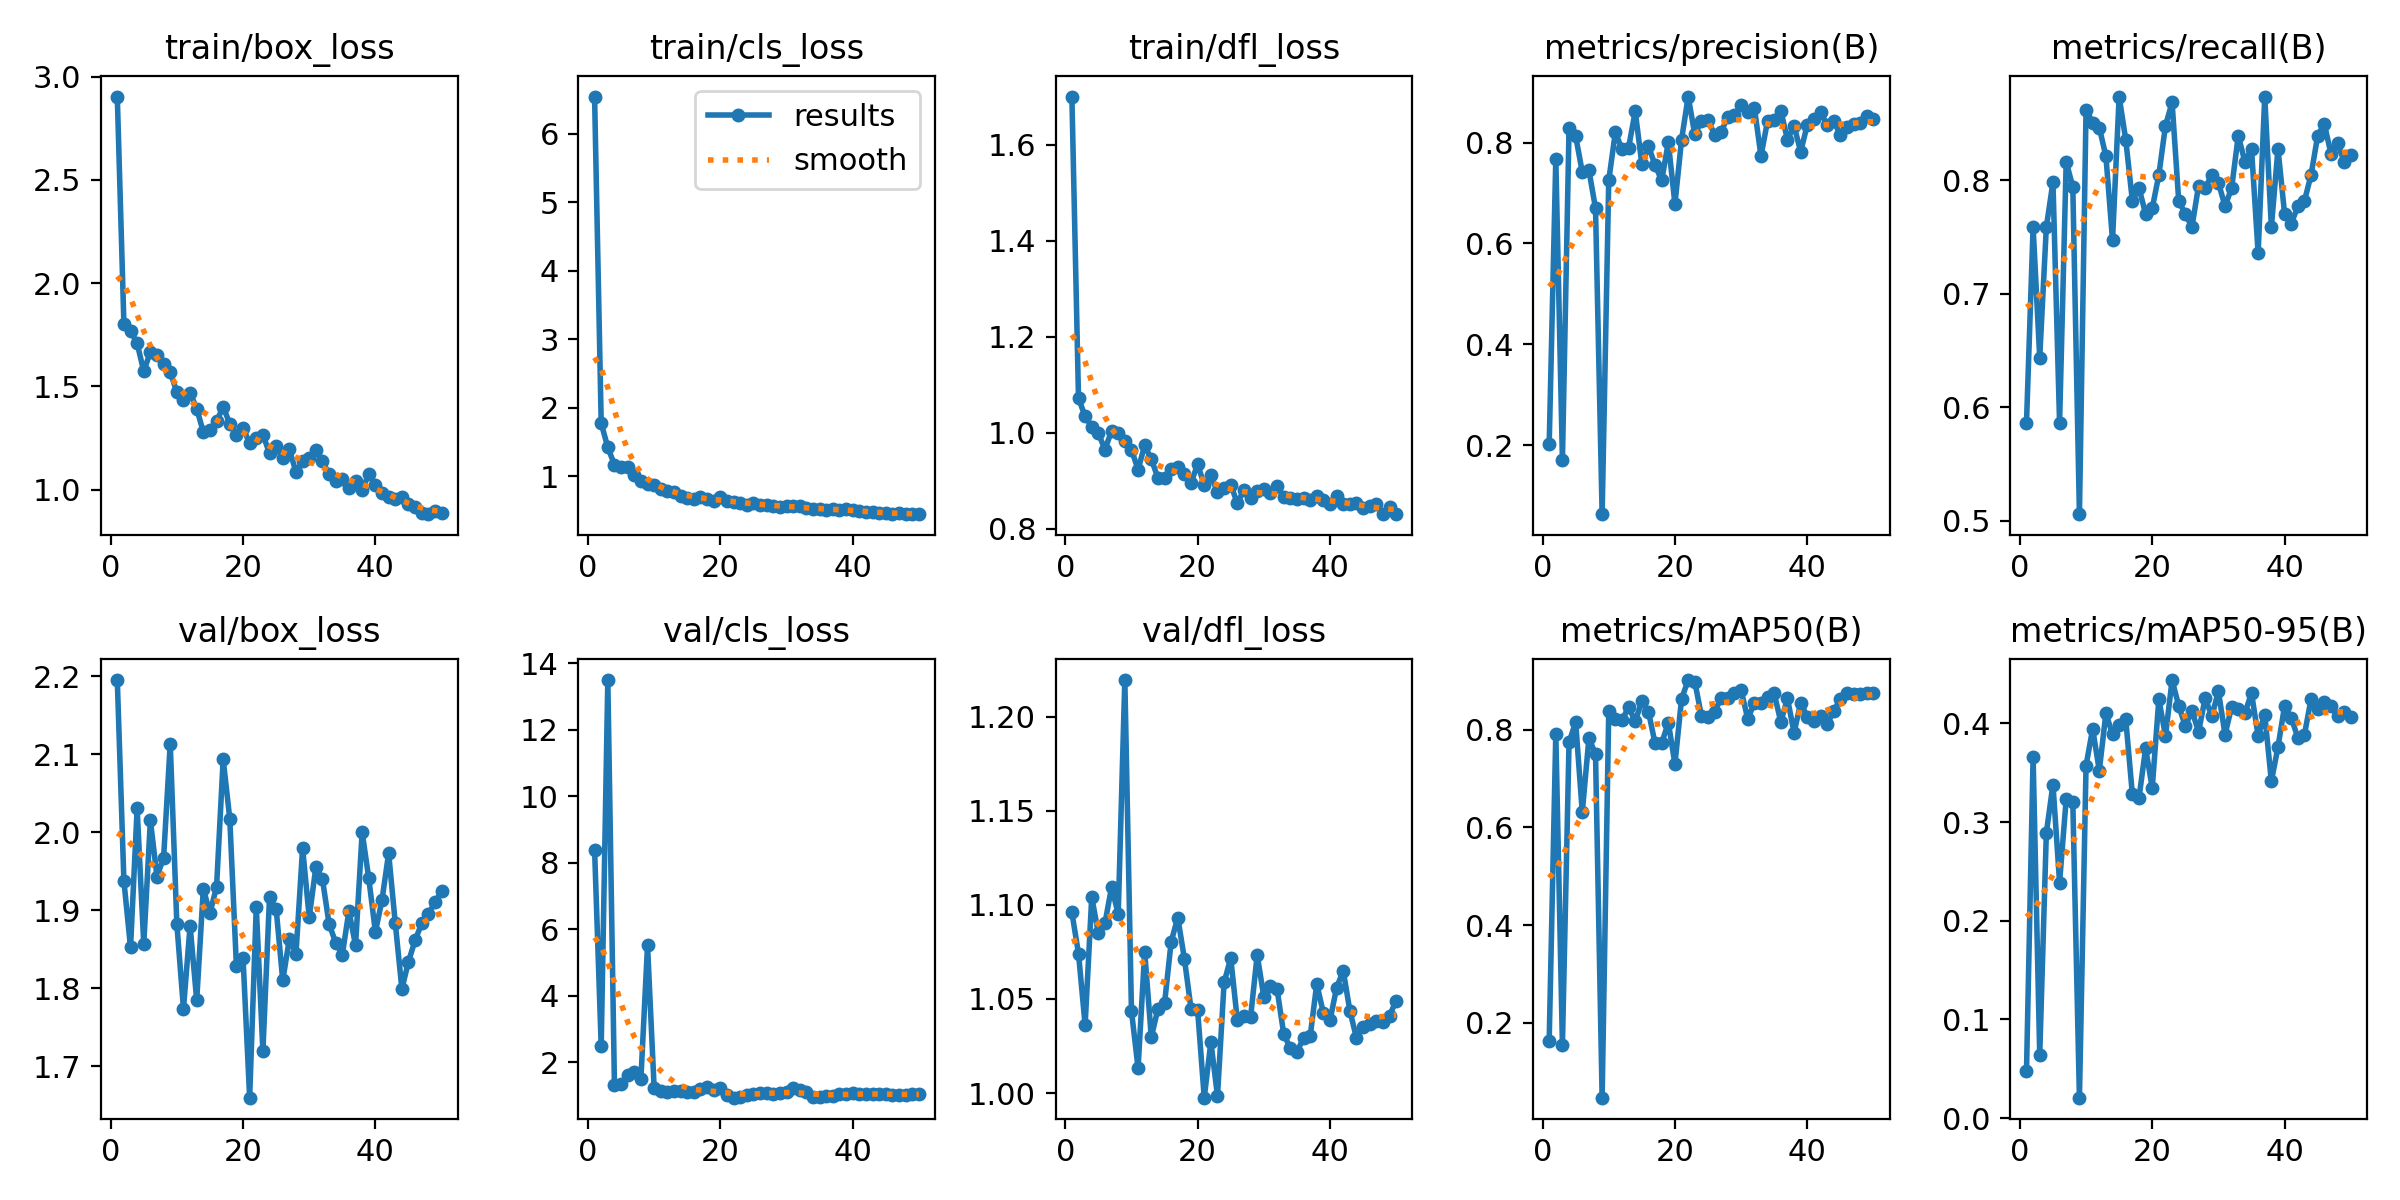

In [4]:
model = YOLO("./runs/detect/train/weights/best.pt")

#### Métricas validación

In [5]:
metrics8s = model.val()
print(metrics8s)

Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


Fontconfig warning: ignoring UTF-8: not a valid region tag
val: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.05s/it]


                   all         20         87      0.816      0.869      0.898      0.444
Speed: 6.8ms preprocess, 284.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val6
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x16c99bdd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033

In [131]:
print('Precisión media en umbrales de IoU de 0.5 a 0.95:', metrics8s.box.map*100, '%')  
print('Precisión media en el umbral de IoU de 0.5:',metrics8s.box.map50*100,'%')  
print('Precisión media en el umbral de IoU de 0.75:',metrics8s.box.map75*100,'%' )  

Precisión media en umbrales de IoU de 0.5 a 0.95: 44.41539351832744 %
Precisión media en el umbral de IoU de 0.5: 89.7591295275528 %
Precisión media en el umbral de IoU de 0.75: 37.84588378250122 %


In [132]:
for key in metrics8s.results_dict.keys():
    print(key, metrics8s.results_dict[key])

metrics/precision(B) 0.8163555925208857
metrics/recall(B) 0.8686534480112902
metrics/mAP50(B) 0.897591295275528
metrics/mAP50-95(B) 0.4441539351832744
fitness 0.48949767119249976


#### Evaluación test

In [133]:
model.eval()
results = model('./test')


image 1/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg: 640x640 5 Numberss, 192.0ms
image 2/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg: 640x640 11 Numberss, 177.0ms
image 3/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg: 640x640 3 Numberss, 261.1ms
image 4/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/4_png.rf.a581e378841aafbd9abde47536591fa9.jpg: 640x640 3 Numberss, 226.0ms
image 5/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg: 640x640 7 Numberss, 195.1ms
image

#### Detección de números

In [7]:
with open('./numeros_test.txt', 'r') as archivo:
    contenido = archivo.read()
    print(contenido)

true_numbers = {}

for linea in contenido.strip().split('\n'):
    nombre_imagen, numeros = linea.split(': ')
    lista_numeros = numeros.split(', ')
    true_numbers[nombre_imagen] = lista_numeros

18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg: 23950, 35964, 15554, 54327, 53716, 36676, 62233, F163, 28732, 15704, 57643
26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg: 1897, 971, 1480
13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg: 3268, 3261, 2578
7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg: 40019, 40258, 40011, 40637, 40685, 40014
8_png.rf.aab1a32947f05ea3b7425031e8fca67c.jpg: 821, 944, 893, 690
4_png.rf.a581e378841aafbd9abde47536591fa9.jpg: 26251, 21431
img9_jpg.rf.0fe40324a106a868beebdc2544cd4388.jpg: 278, 478, 302, 324, 304, 489
img8_jpg.rf.083354642ae3bafe7807e1000335206d.jpg: 428, 731, 401, 316
C2105_META-2664_jpg.rf.05f2f2d293d40abb5251b4ba88c6c694.jpg: 1438, 14009, 8389
C2105_META-2663_jpg.rf.780d79276e053efa11a1b83398ba663a.jpg: 2066, 1438, 3970, 14544
C2105_META-2669_jpg.rf.3ad86ea3c81e3de49b53fcc71a6c4ec6.jpg: 1077, 14265, 14303, 15126, 167


In [135]:
def identificar_numero(ruta_test, results):
    reader = easyocr.Reader(['en'])
    c=0
    total=0
    correctas=0

    for result in results:
        conteo=0
        c+=1
        #print(c, result.path)
        name_img=result.path.split('/')[-1]
        #nuevo_nombre_archivo=name_img.split('.')[0].rsplit('_', 1)
        #nuevo_nombre_archivo='.'.join(nuevo_nombre_archivo)
        revision=true_numbers[name_img]
        total+=len(revision)
        image = Image.open(os.path.join(ruta_test, name_img))
        for box in result.boxes:
            # Obtener las coordenadas del bounding box (x1, y1, x2, y2)
            x1, y1, x2, y2 = box.xyxy[0].numpy().astype(int)
            
            # Recortar la imagen usando las coordenadas del bounding box
            cropped_image = image.crop((x1, y1, x2, y2))
            cropped_image_np = np.array(cropped_image)
            result = reader.readtext(cropped_image_np)
            for detection in result:
                text = detection[1]
                numbers = re.findall(r'\d+', text)  
                if numbers:
                    #print('he detectado', numbers)
                    if numbers[0] in revision:
                        conteo+=1
                        correctas+=1
        #print('revision:', revision)
            
        #print(len(revision), 'el conteo fue de ',conteo)
        
        #print('----------------------------------------------')
    print('Total de números', total)
    print('Total de números identificados correctos', correctas)
    print('Porcentaje de aciertos', correctas/total*100, '%')
    print('Porcentaje de error', 100-(correctas/total*100), '%')

In [138]:
identificar_numero(TEST, results)

Total de números 51
Total de números identificados correctos 21
Porcentaje de aciertos 41.17647058823529 %
Porcentaje de error 58.82352941176471 %


### **Yolo8 nano**

#### Entrenamiento

In [139]:
model = YOLO("yolov8n.pt") 

model.train(
    data="./dataset.yaml",
    epochs=50,
    batch=8,    # Reduce el tamaño del lote
    imgsz=640,  # Reduce el tamaño de las imágenes
    workers=4   # Limita el número de trabajadores
)

100%|██████████| 6.25M/6.25M [00:01<00:00, 3.59MB/s]


New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

train: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/train.cache... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<?, ?it/s]
val: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G       2.94      4.837      1.638         77        640: 100%|██████████| 18/18 [01:02<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         20         87    0.00333       0.23    0.00237   0.000487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.018      2.637      1.119         37        640: 100%|██████████| 18/18 [00:51<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all         20         87     0.0102      0.701     0.0103     0.0034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.865      2.079      1.043         50        640: 100%|██████████| 18/18 [00:52<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         20         87     0.0105      0.724     0.0389     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.884       1.84      1.054         36        640: 100%|██████████| 18/18 [00:53<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         20         87    0.00983      0.678      0.232     0.0732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.807      1.702      1.059         28        640: 100%|██████████| 18/18 [00:53<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         20         87      0.781     0.0416      0.307      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.849      1.758       1.01         44        640: 100%|██████████| 18/18 [00:52<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         20         87      0.196      0.168      0.119     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.706       1.52      1.013         31        640: 100%|██████████| 18/18 [00:53<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         20         87      0.829      0.502      0.602      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.664      1.499      1.016         49        640: 100%|██████████| 18/18 [00:52<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         20         87      0.915      0.373      0.549       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.601      1.352     0.9984         45        640: 100%|██████████| 18/18 [00:53<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         20         87      0.685       0.69      0.696      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.557      1.336     0.9794         22        640: 100%|██████████| 18/18 [00:53<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         20         87      0.792      0.724       0.75      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.571      1.299     0.9499         53        640: 100%|██████████| 18/18 [00:54<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         20         87      0.767      0.681      0.734       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.519      1.198     0.9841         46        640: 100%|██████████| 18/18 [00:52<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         20         87      0.721      0.747      0.746      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G       1.51      1.203      0.976         43        640: 100%|██████████| 18/18 [00:53<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         20         87      0.833      0.803      0.829      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.448      1.091     0.9405         72        640: 100%|██████████| 18/18 [00:53<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all         20         87      0.767      0.828       0.81      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.441      1.169     0.9374         26        640: 100%|██████████| 18/18 [00:52<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all         20         87      0.827       0.77      0.811      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.445      1.063     0.9538         26        640: 100%|██████████| 18/18 [00:53<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all         20         87      0.737      0.828      0.825      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.478      1.108     0.9522         38        640: 100%|██████████| 18/18 [00:50<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         20         87      0.778      0.747      0.721      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.511      1.028     0.9646         48        640: 100%|██████████| 18/18 [00:50<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         20         87      0.879      0.724      0.822       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.394     0.9305     0.9254         69        640: 100%|██████████| 18/18 [00:49<00:00,  2.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         20         87      0.781      0.782      0.807       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.408     0.9983     0.9529         51        640: 100%|██████████| 18/18 [00:49<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         20         87       0.78      0.793      0.793      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.344     0.9268     0.9152         40        640: 100%|██████████| 18/18 [00:49<00:00,  2.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all         20         87      0.868      0.756      0.817      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.412     0.9202     0.9405         52        640: 100%|██████████| 18/18 [00:47<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         20         87      0.746      0.805       0.77      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.405     0.8879     0.8972         52        640: 100%|██████████| 18/18 [00:49<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all         20         87      0.782      0.908       0.85      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.364     0.9148     0.9196         45        640: 100%|██████████| 18/18 [00:48<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all         20         87      0.771      0.839        0.8      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.377     0.9148     0.9263         16        640: 100%|██████████| 18/18 [00:48<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         20         87      0.761      0.782      0.776      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.319     0.8515     0.8804         65        640: 100%|██████████| 18/18 [00:57<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         20         87      0.787      0.816      0.819      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.337     0.8419     0.9088         48        640: 100%|██████████| 18/18 [00:55<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]

                   all         20         87      0.781      0.759      0.811      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.185     0.8103     0.8891         27        640: 100%|██████████| 18/18 [01:00<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         20         87      0.816      0.782      0.806      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.207      0.802     0.8929         48        640: 100%|██████████| 18/18 [01:05<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         20         87      0.785      0.757      0.766      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G       1.24     0.7739     0.8958         54        640: 100%|██████████| 18/18 [01:04<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all         20         87      0.724      0.828      0.809      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.243     0.8038     0.8866         31        640: 100%|██████████| 18/18 [00:55<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         20         87      0.779       0.81      0.791      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G       1.22     0.7695     0.9114         40        640: 100%|██████████| 18/18 [00:53<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         20         87      0.793      0.749      0.771      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.221     0.7716     0.8903         50        640: 100%|██████████| 18/18 [00:53<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         20         87      0.813      0.736      0.778      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.183      0.733     0.8888         36        640: 100%|██████████| 18/18 [00:54<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]

                   all         20         87      0.799      0.759       0.79      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.189     0.7304     0.8814         30        640: 100%|██████████| 18/18 [00:52<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         20         87      0.869      0.764      0.838      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.124     0.7455     0.8852         47        640: 100%|██████████| 18/18 [00:54<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         20         87      0.787      0.759      0.767       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.162      0.752     0.8772         16        640: 100%|██████████| 18/18 [00:56<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         20         87      0.822      0.816      0.797      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G       1.13     0.7088     0.8895         43        640: 100%|██████████| 18/18 [00:52<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         20         87      0.789      0.819      0.804      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.181     0.7305     0.8797         37        640: 100%|██████████| 18/18 [00:53<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all         20         87      0.771      0.773      0.769      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.135     0.6922     0.8689         49        640: 100%|██████████| 18/18 [00:53<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         20         87       0.83      0.788      0.822      0.362


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G        1.1     0.7037     0.8879         24        640: 100%|██████████| 18/18 [00:53<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         20         87       0.85      0.782      0.818      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.098     0.6847     0.8751         27        640: 100%|██████████| 18/18 [00:51<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all         20         87       0.83      0.787      0.814      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.077     0.6794     0.8768         32        640: 100%|██████████| 18/18 [00:51<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         20         87      0.828      0.805      0.831      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.093       0.68     0.8825         28        640: 100%|██████████| 18/18 [00:51<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         20         87      0.823      0.799      0.827      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.056     0.6499     0.8668         27        640: 100%|██████████| 18/18 [00:51<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         20         87      0.828      0.816      0.853      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.051     0.6638     0.8707         39        640: 100%|██████████| 18/18 [00:51<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         20         87      0.862      0.792      0.857      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.026     0.6469     0.8724         22        640: 100%|██████████| 18/18 [00:51<00:00,  2.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         20         87      0.859      0.793      0.857      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G       1.03     0.6506     0.8481         30        640: 100%|██████████| 18/18 [00:52<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all         20         87      0.841       0.77      0.824      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.035     0.6336     0.8656         22        640: 100%|██████████| 18/18 [00:53<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]

                   all         20         87      0.849      0.776      0.827      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.031     0.6409     0.8495         25        640: 100%|██████████| 18/18 [00:54<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         20         87      0.868      0.782       0.86      0.387



50 epochs completed in 0.785 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


                   all         20         87      0.862      0.792      0.857        0.4
Speed: 4.9ms preprocess, 126.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x16b205d00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

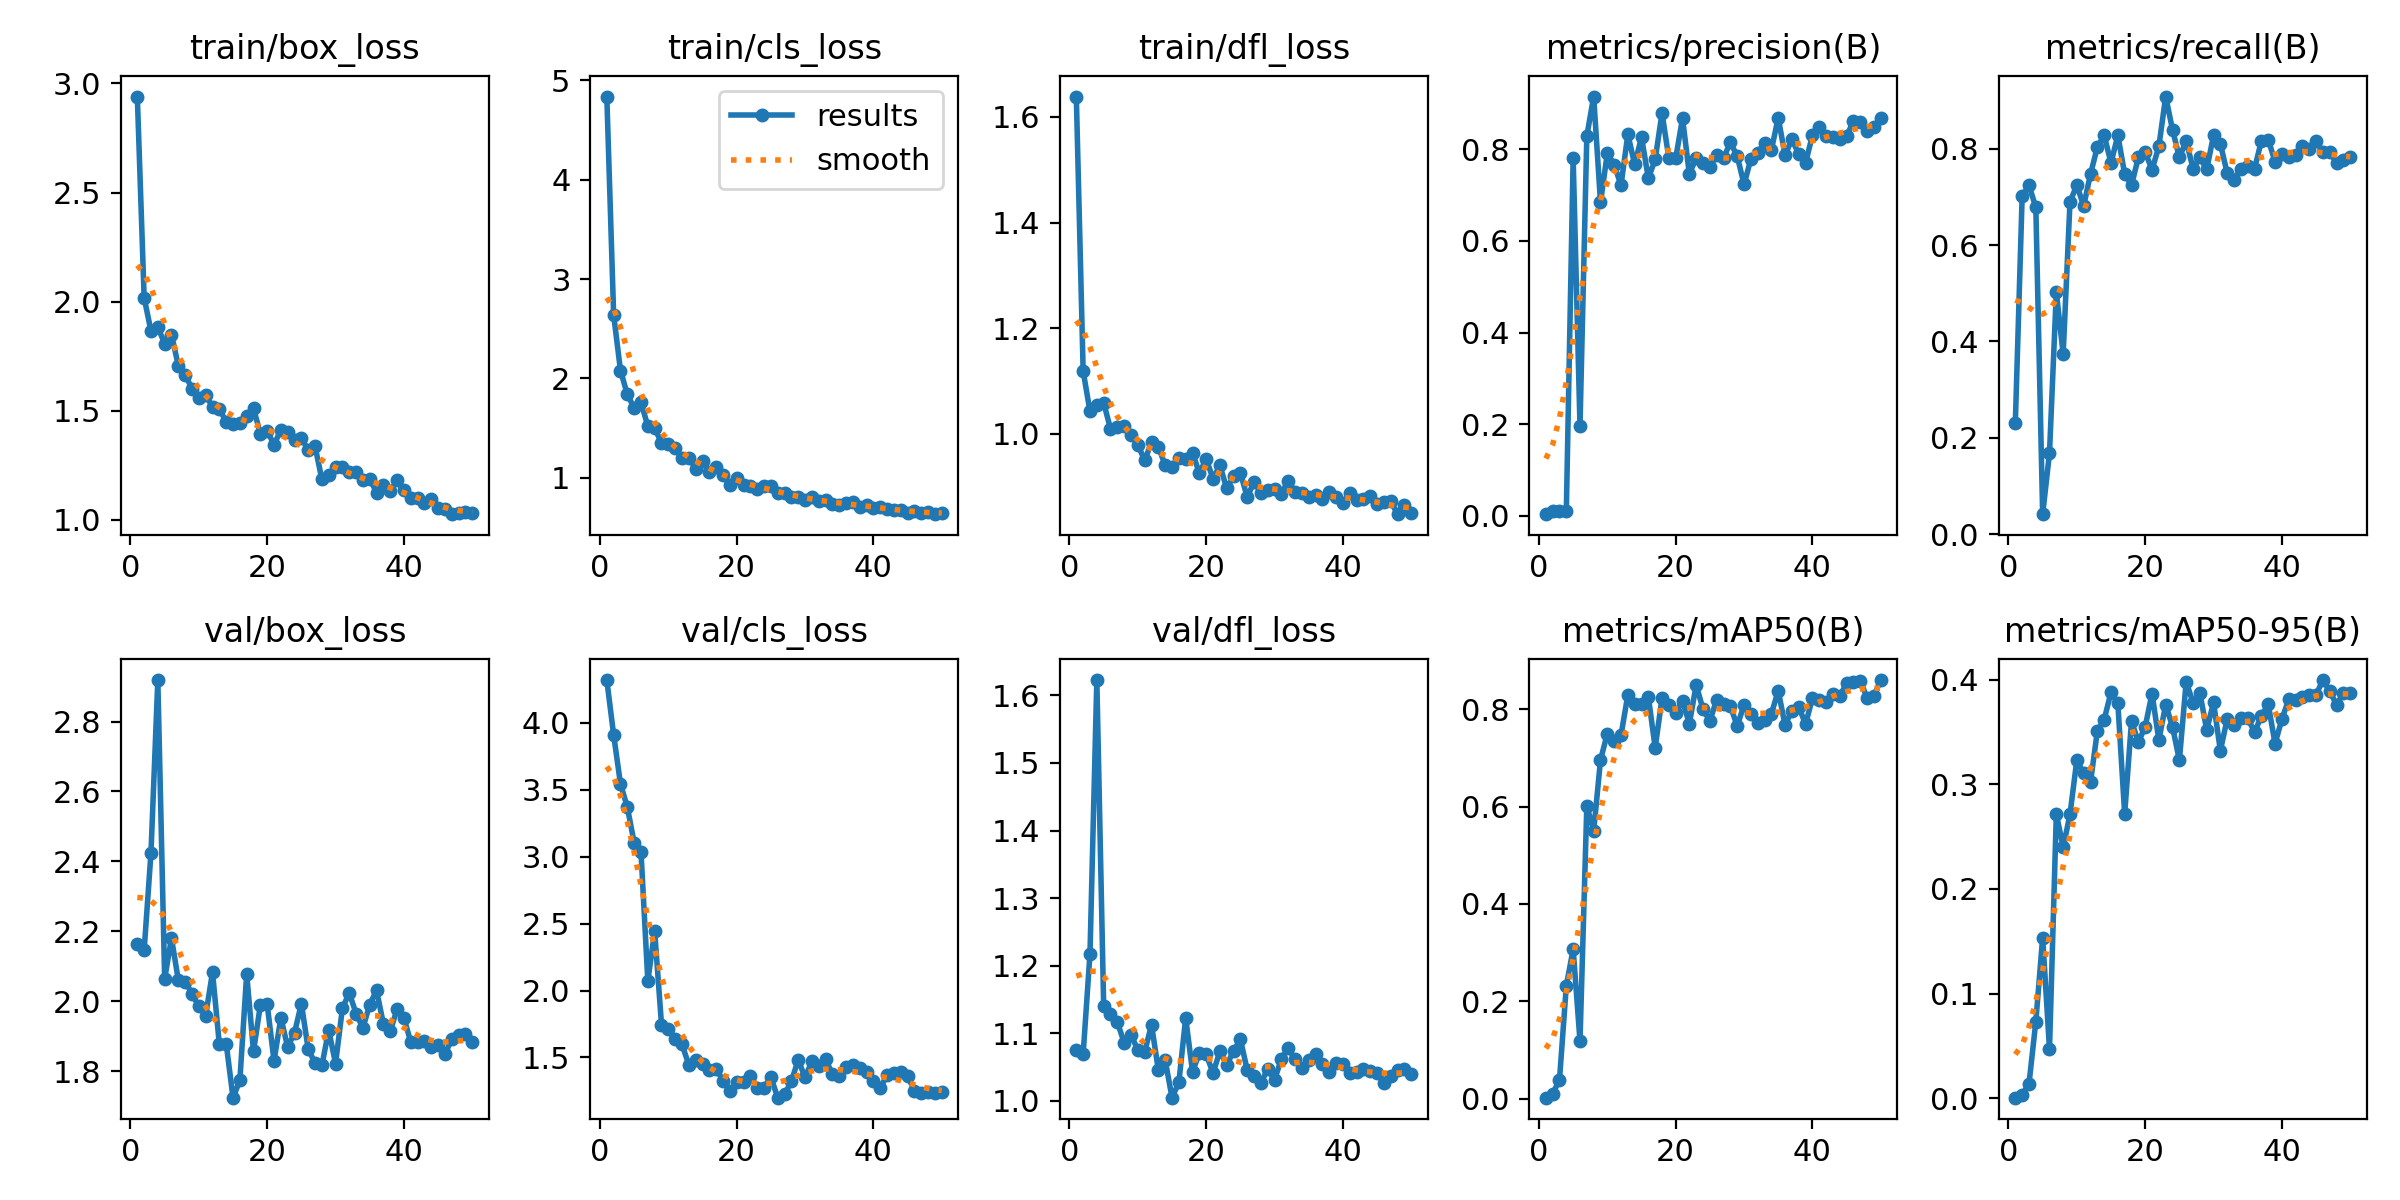

In [6]:
model = YOLO("./runs/detect/train2/weights/best.pt")

#### Métricas validación

In [7]:
metrics8n = model.val()
print(metrics8n)

Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]


                   all         20         87      0.862      0.792      0.857        0.4
Speed: 5.7ms preprocess, 119.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val7
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x1781f62a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033

In [142]:
print('Precisión media en umbrales de IoU de 0.5 a 0.95:', metrics8n.box.map*100, '%')  
print('Precisión media en el umbral de IoU de 0.5:',metrics8n.box.map50*100,'%')  
print('Precisión media en el umbral de IoU de 0.75:',metrics8n.box.map75*100,'%' )  

Precisión media en umbrales de IoU de 0.5 a 0.95: 39.95706404188748 %
Precisión media en el umbral de IoU de 0.5: 85.68507967379159 %
Precisión media en el umbral de IoU de 0.75: 31.980743143732592 %


In [143]:
for key in metrics8n.results_dict.keys():
    print(key, metrics8n.results_dict[key])

metrics/precision(B) 0.8624012175368632
metrics/recall(B) 0.7924510917794932
metrics/mAP50(B) 0.8568507967379159
metrics/mAP50-95(B) 0.3995706404188748
fitness 0.4452986560507789


#### Evaluación test

In [144]:
model.eval()
results = model('./test')


image 1/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg: 640x640 4 Numberss, 97.2ms
image 2/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg: 640x640 7 Numberss, 87.8ms
image 3/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg: 640x640 1 Numbers, 88.9ms
image 4/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/4_png.rf.a581e378841aafbd9abde47536591fa9.jpg: 640x640 4 Numberss, 90.9ms
image 5/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg: 640x640 7 Numberss, 83.9ms
image 6/11 /

#### Detección de números

In [145]:
identificar_numero(TEST, results)

Total de números 51
Total de números identificados correctos 19
Porcentaje de aciertos 37.254901960784316 %
Porcentaje de error 62.745098039215684 %


### **Yolo11 small**

#### Entrenamiento

In [148]:
model = YOLO("yolo11s.pt") 

model.train(
    data="./dataset.yaml",
    epochs=50,
    batch=8,    # Reduce el tamaño del lote
    imgsz=640,  # Reduce el tamaño de las imágenes
    workers=4   # Limita el número de trabajadores
)

New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=./dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

train: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/train.cache... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<?, ?it/s]
val: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.685      8.222      1.545         77        640: 100%|██████████| 18/18 [02:10<00:00,  7.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.28s/it]

                   all         20         87      0.443      0.678      0.515      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.717      2.454      1.055         37        640: 100%|██████████| 18/18 [02:04<00:00,  6.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.15s/it]

                   all         20         87      0.361      0.621      0.295      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       1.84      2.202      1.064         50        640: 100%|██████████| 18/18 [02:01<00:00,  6.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.03s/it]

                   all         20         87     0.0107      0.437     0.0074    0.00391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.736      1.418      1.015         36        640: 100%|██████████| 18/18 [02:00<00:00,  6.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.09s/it]

                   all         20         87     0.0039       0.23    0.00218    0.00102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.639      1.229      1.017         28        640: 100%|██████████| 18/18 [02:03<00:00,  6.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.70s/it]

                   all         20         87      0.848      0.642      0.735      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.783      1.251       1.01         44        640: 100%|██████████| 18/18 [02:02<00:00,  6.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.56s/it]

                   all         20         87      0.642      0.414      0.463      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.763      1.039      1.046         31        640: 100%|██████████| 18/18 [01:59<00:00,  6.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.35s/it]

                   all         20         87      0.632      0.448      0.468      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G       1.66      1.071      1.033         49        640: 100%|██████████| 18/18 [01:53<00:00,  6.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.60s/it]

                   all         20         87      0.571      0.563      0.416      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G        1.6     0.9464      1.006         45        640: 100%|██████████| 18/18 [01:53<00:00,  6.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.43s/it]

                   all         20         87      0.236      0.575      0.185     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.541     0.9453     0.9817         22        640: 100%|██████████| 18/18 [01:59<00:00,  6.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]

                   all         20         87      0.766      0.724      0.725      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.462     0.8582     0.9372         53        640: 100%|██████████| 18/18 [01:59<00:00,  6.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.51s/it]

                   all         20         87      0.709      0.701      0.704      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.538     0.8624     0.9871         46        640: 100%|██████████| 18/18 [01:59<00:00,  6.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.51s/it]

                   all         20         87      0.781      0.747      0.777      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.482     0.8468     0.9748         43        640: 100%|██████████| 18/18 [01:59<00:00,  6.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.48s/it]

                   all         20         87      0.825      0.812      0.839      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.323       0.78     0.9217         72        640: 100%|██████████| 18/18 [02:00<00:00,  6.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.50s/it]

                   all         20         87      0.815      0.793      0.836      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G       1.42     0.8155     0.9394         26        640: 100%|██████████| 18/18 [01:58<00:00,  6.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.30s/it]

                   all         20         87      0.816      0.818      0.806       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.432     0.8274     0.9518         26        640: 100%|██████████| 18/18 [01:53<00:00,  6.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]

                   all         20         87      0.763      0.816      0.778       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.465     0.7949     0.9551         38        640: 100%|██████████| 18/18 [01:59<00:00,  6.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]

                   all         20         87      0.818      0.805      0.819      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.402     0.7697     0.9487         48        640: 100%|██████████| 18/18 [02:00<00:00,  6.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.57s/it]

                   all         20         87      0.867      0.816      0.862      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.298     0.7197     0.9141         69        640: 100%|██████████| 18/18 [02:00<00:00,  6.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]

                   all         20         87      0.854      0.805      0.836      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.316     0.7291     0.9465         51        640: 100%|██████████| 18/18 [02:01<00:00,  6.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.60s/it]

                   all         20         87      0.763      0.793      0.826       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.275     0.6875     0.9114         40        640: 100%|██████████| 18/18 [01:59<00:00,  6.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.31s/it]

                   all         20         87      0.812      0.696      0.755      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.317     0.6852     0.9193         52        640: 100%|██████████| 18/18 [01:51<00:00,  6.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.40s/it]

                   all         20         87      0.764      0.828      0.794      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.297     0.6552     0.8792         52        640: 100%|██████████| 18/18 [01:52<00:00,  6.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]

                   all         20         87      0.835      0.839      0.888      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.244     0.6403     0.8952         45        640: 100%|██████████| 18/18 [01:52<00:00,  6.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.41s/it]

                   all         20         87       0.76      0.805      0.811      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.266     0.6831      0.909         16        640: 100%|██████████| 18/18 [01:51<00:00,  6.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.42s/it]

                   all         20         87      0.813      0.874      0.854      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.245     0.6349      0.879         65        640: 100%|██████████| 18/18 [02:07<00:00,  7.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.57s/it]

                   all         20         87      0.832      0.851      0.848      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.235     0.6162      0.899         48        640: 100%|██████████| 18/18 [02:00<00:00,  6.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]

                   all         20         87      0.857      0.828      0.833      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.179     0.6359     0.8809         27        640: 100%|██████████| 18/18 [01:59<00:00,  6.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.56s/it]

                   all         20         87      0.823      0.782      0.817      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.189     0.6182     0.8966         48        640: 100%|██████████| 18/18 [02:00<00:00,  6.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.58s/it]

                   all         20         87      0.842      0.794       0.83      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.172     0.6152     0.8866         54        640: 100%|██████████| 18/18 [02:00<00:00,  6.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.58s/it]

                   all         20         87      0.835       0.77      0.815      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.173     0.5948     0.8774         31        640: 100%|██████████| 18/18 [01:57<00:00,  6.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.32s/it]

                   all         20         87      0.755      0.828      0.799      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.172        0.6     0.9042         40        640: 100%|██████████| 18/18 [01:52<00:00,  6.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.34s/it]

                   all         20         87      0.778      0.847       0.81      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.085     0.5547     0.8732         50        640: 100%|██████████| 18/18 [01:52<00:00,  6.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.44s/it]

                   all         20         87      0.843      0.799        0.8      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.087     0.5483     0.8757         36        640: 100%|██████████| 18/18 [01:51<00:00,  6.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.34s/it]

                   all         20         87      0.829      0.793      0.806      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.144     0.5516     0.8789         30        640: 100%|██████████| 18/18 [01:52<00:00,  6.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.41s/it]

                   all         20         87      0.823      0.828      0.814       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.066     0.5407     0.8809         47        640: 100%|██████████| 18/18 [02:08<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.52s/it]

                   all         20         87      0.769       0.84      0.815        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.098     0.5431      0.874         16        640: 100%|██████████| 18/18 [02:01<00:00,  6.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.53s/it]

                   all         20         87      0.805      0.854      0.863      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.049     0.5336     0.8876         43        640: 100%|██████████| 18/18 [02:00<00:00,  6.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]

                   all         20         87      0.784      0.839      0.813      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.109     0.5521     0.8766         37        640: 100%|██████████| 18/18 [02:00<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.56s/it]

                   all         20         87      0.774      0.868      0.823      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.024     0.5135     0.8579         49        640: 100%|██████████| 18/18 [02:01<00:00,  6.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.57s/it]

                   all         20         87      0.813      0.862      0.892      0.461


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.043     0.5259     0.8832         24        640: 100%|██████████| 18/18 [02:01<00:00,  6.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]

                   all         20         87      0.863      0.839      0.894       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G       1.03     0.4995     0.8663         27        640: 100%|██████████| 18/18 [01:53<00:00,  6.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.33s/it]

                   all         20         87      0.878      0.816      0.852      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9882     0.4801     0.8636         32        640: 100%|██████████| 18/18 [01:59<00:00,  6.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.49s/it]

                   all         20         87      0.887      0.828      0.848      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9799     0.4812     0.8624         28        640: 100%|██████████| 18/18 [01:58<00:00,  6.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.50s/it]

                   all         20         87      0.843      0.828       0.83      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9603     0.4662     0.8513         27        640: 100%|██████████| 18/18 [01:59<00:00,  6.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.50s/it]

                   all         20         87      0.794      0.841      0.824      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9658     0.4684      0.862         39        640: 100%|██████████| 18/18 [02:02<00:00,  6.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.54s/it]

                   all         20         87      0.801      0.816      0.828      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9334     0.4662     0.8659         22        640: 100%|██████████| 18/18 [02:00<00:00,  6.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.62s/it]

                   all         20         87      0.805      0.828      0.819      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9478     0.4597     0.8407         30        640: 100%|██████████| 18/18 [02:00<00:00,  6.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.53s/it]

                   all         20         87      0.802      0.828      0.816      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      0.929       0.45     0.8554         22        640: 100%|██████████| 18/18 [02:00<00:00,  6.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.58s/it]

                   all         20         87      0.793      0.851      0.816      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.9316     0.4474     0.8376         25        640: 100%|██████████| 18/18 [02:00<00:00,  6.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.55s/it]

                   all         20         87      0.807      0.839       0.82      0.429



50 epochs completed in 1.738 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 19.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.28s/it]


                   all         20         87      0.813      0.862      0.892       0.46
Speed: 4.7ms preprocess, 215.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x1ac0048f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

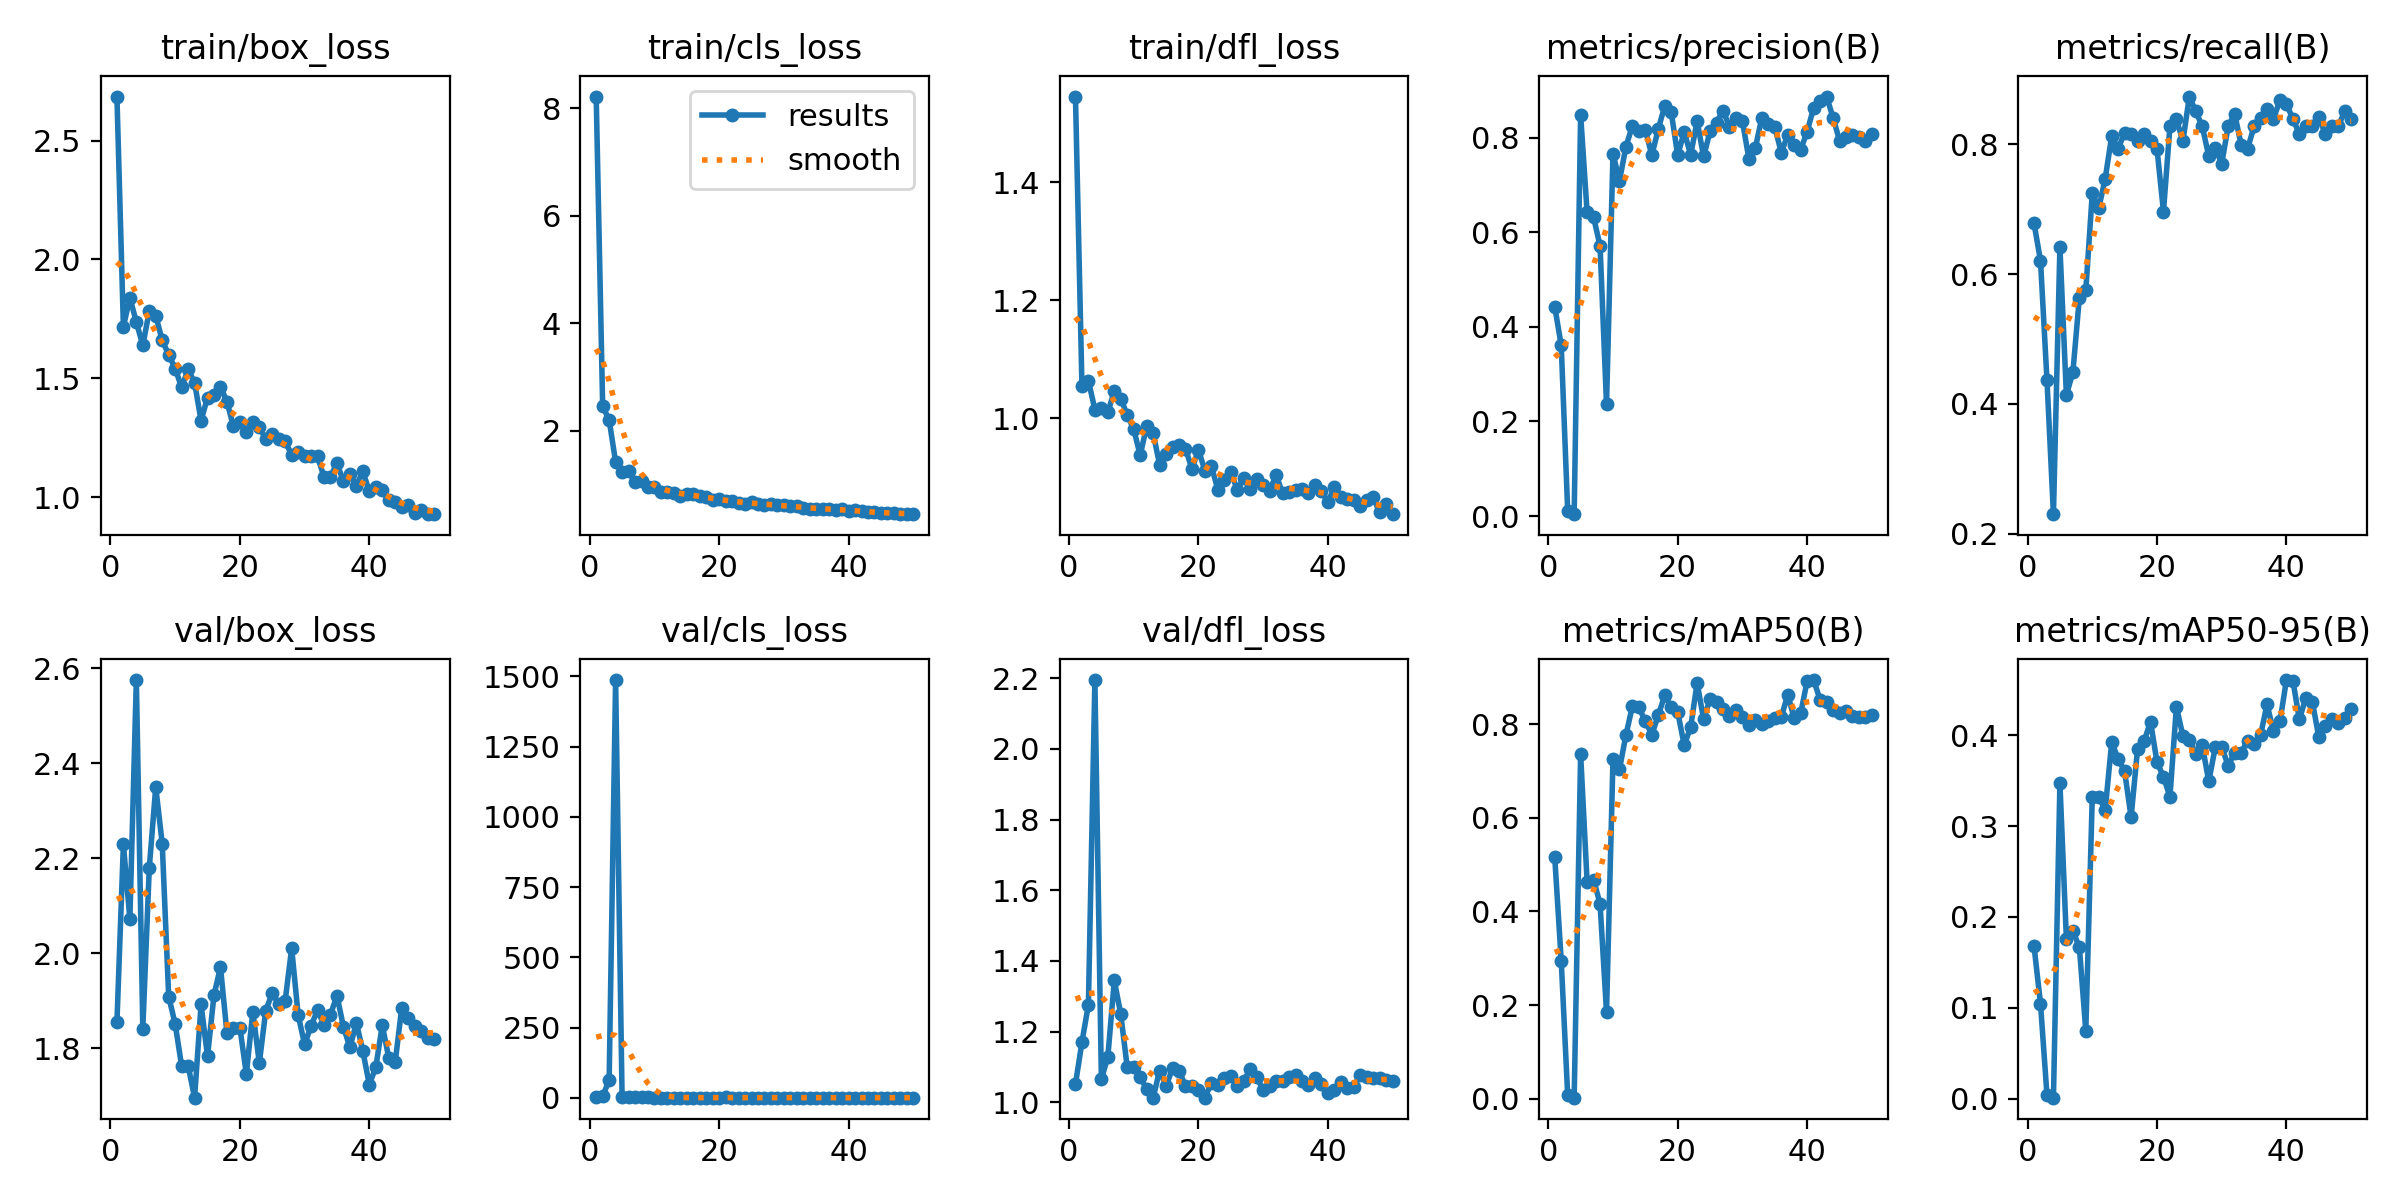

In [8]:
model = YOLO("./runs/detect/train3/weights/best.pt")

#### Métricas validación

In [9]:
metrics11s = model.val()
print(metrics11s)

Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.34s/it]


                   all         20         87      0.813      0.862      0.892       0.46
Speed: 6.1ms preprocess, 318.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val8
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x177d2de20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033

In [151]:
print('Precisión media en umbrales de IoU de 0.5 a 0.95:', metrics11s.box.map*100, '%')  
print('Precisión media en el umbral de IoU de 0.5:',metrics11s.box.map50*100,'%')  
print('Precisión media en el umbral de IoU de 0.75:',metrics11s.box.map75*100,'%' )  

Precisión media en umbrales de IoU de 0.5 a 0.95: 46.04838386573043 %
Precisión media en el umbral de IoU de 0.5: 89.18783774804137 %
Precisión media en el umbral de IoU de 0.75: 41.73047910509863 %


In [152]:
for key in metrics11s.results_dict.keys():
    print(key, metrics11s.results_dict[key])

metrics/precision(B) 0.8130614051340534
metrics/recall(B) 0.8620689655172413
metrics/mAP50(B) 0.8918783774804138
metrics/mAP50-95(B) 0.4604838386573043
fitness 0.5036232925396152


#### Evaluación test

In [153]:
model.eval()
results = model('./test')

image 1/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg: 640x640 3 Numberss, 224.0ms
image 2/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg: 640x640 11 Numberss, 208.8ms
image 3/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg: 640x640 3 Numberss, 194.2ms
image 4/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/4_png.rf.a581e378841aafbd9abde47536591fa9.jpg: 640x640 2 Numberss, 286.8ms
image 5/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg: 640x640 6 Numberss, 270.0ms
image 

#### Detección de números

In [154]:
identificar_numero(TEST, results)

Total de números 51
Total de números identificados correctos 19
Porcentaje de aciertos 37.254901960784316 %
Porcentaje de error 62.745098039215684 %


### **Yolo11 Nano**

#### Entrenamiento

In [156]:
model = YOLO("yolo11n.pt") 

model.train(
    data="./dataset.yaml",
    epochs=50,
    batch=8,    # Reduce el tamaño del lote
    imgsz=640,  # Reduce el tamaño de las imágenes
    workers=4   # Limita el número de trabajadores
)

New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=./dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

train: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/train.cache... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<?, ?it/s]
val: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

Plotting labels to runs/detect/train4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.834      4.933      1.577         77        640: 100%|██████████| 18/18 [01:03<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all         20         87    0.00633      0.437    0.00491    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.937      2.916      1.086         37        640: 100%|██████████| 18/18 [01:01<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all         20         87      0.007      0.483    0.00646     0.0021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.886      2.185      1.009         50        640: 100%|██████████| 18/18 [01:01<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         20         87       0.01       0.69     0.0114    0.00538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.875      1.933      1.023         36        640: 100%|██████████| 18/18 [01:01<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         20         87      0.008      0.552      0.013    0.00409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.763      1.826      1.041         28        640: 100%|██████████| 18/18 [01:00<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.50s/it]

                   all         20         87    0.00917      0.632      0.101     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.913      1.812      1.025         44        640: 100%|██████████| 18/18 [01:01<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]

                   all         20         87      0.748      0.184      0.403      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.829      1.637      1.048         31        640: 100%|██████████| 18/18 [01:01<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         20         87      0.678      0.363       0.48      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.865      1.698      1.068         49        640: 100%|██████████| 18/18 [01:00<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all         20         87      0.755      0.632      0.689       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.746      1.487       1.03         45        640: 100%|██████████| 18/18 [01:00<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all         20         87      0.692      0.569      0.597      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G       1.63       1.51      1.004         22        640: 100%|██████████| 18/18 [00:59<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         20         87      0.841      0.731      0.789      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.638      1.473     0.9742         53        640: 100%|██████████| 18/18 [00:55<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         20         87      0.844      0.685      0.783      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G       1.57      1.341     0.9922         46        640: 100%|██████████| 18/18 [00:55<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         20         87      0.764      0.746       0.78      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.537      1.309     0.9749         43        640: 100%|██████████| 18/18 [00:55<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         20         87      0.835      0.759      0.816       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G       1.48      1.189     0.9423         72        640: 100%|██████████| 18/18 [00:59<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all         20         87      0.709      0.701      0.716      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G       1.56      1.282      0.955         26        640: 100%|██████████| 18/18 [01:08<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all         20         87      0.751      0.796      0.789      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.543      1.193     0.9755         26        640: 100%|██████████| 18/18 [01:04<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]

                   all         20         87      0.752      0.713      0.739      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G       1.57      1.255     0.9719         38        640: 100%|██████████| 18/18 [01:09<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.87s/it]

                   all         20         87      0.787      0.849      0.829      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.602      1.187     0.9824         48        640: 100%|██████████| 18/18 [01:04<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]

                   all         20         87      0.768      0.793      0.825      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.528      1.093     0.9442         69        640: 100%|██████████| 18/18 [01:01<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         20         87      0.748      0.724      0.746      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.478      1.178     0.9674         51        640: 100%|██████████| 18/18 [01:07<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.37s/it]

                   all         20         87      0.803      0.752      0.856      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G        1.5      1.123     0.9413         40        640: 100%|██████████| 18/18 [00:59<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         20         87      0.705      0.724       0.75      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.493      1.111     0.9541         52        640: 100%|██████████| 18/18 [00:58<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         20         87      0.796      0.839      0.828      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.433     0.9853      0.902         52        640: 100%|██████████| 18/18 [01:06<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]

                   all         20         87      0.837      0.828      0.837      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.398      1.068     0.9217         45        640: 100%|██████████| 18/18 [01:03<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all         20         87      0.846      0.828      0.871      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.426      1.063     0.9306         16        640: 100%|██████████| 18/18 [01:02<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         20         87      0.837      0.851      0.868      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.356      0.981     0.8935         65        640: 100%|██████████| 18/18 [01:02<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         20         87      0.833      0.803       0.84      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.362      0.933     0.9121         48        640: 100%|██████████| 18/18 [01:02<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all         20         87      0.798      0.828       0.83       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.215     0.9053     0.8918         27        640: 100%|██████████| 18/18 [01:00<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         20         87      0.802      0.747      0.815      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.303     0.9081     0.9039         48        640: 100%|██████████| 18/18 [01:00<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         20         87      0.765      0.828      0.811      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.295     0.8832     0.9065         54        640: 100%|██████████| 18/18 [01:01<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         20         87      0.714      0.759      0.777      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G       1.31     0.8852     0.8962         31        640: 100%|██████████| 18/18 [01:00<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         20         87      0.722      0.745      0.756      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.259     0.8617     0.9201         40        640: 100%|██████████| 18/18 [01:00<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         20         87      0.817      0.716      0.805      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.241     0.8277     0.8945         50        640: 100%|██████████| 18/18 [01:01<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         20         87       0.75      0.747      0.761      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.246     0.8149     0.8942         36        640: 100%|██████████| 18/18 [01:02<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all         20         87      0.747      0.816      0.808        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.267     0.8227     0.8953         30        640: 100%|██████████| 18/18 [01:02<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         20         87      0.854      0.759      0.814      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.202     0.8368     0.8885         47        640: 100%|██████████| 18/18 [01:02<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         20         87      0.829      0.724      0.799      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.221     0.8422     0.8847         16        640: 100%|██████████| 18/18 [01:00<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         20         87      0.776      0.759      0.809      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.144     0.7913     0.8901         43        640: 100%|██████████| 18/18 [01:00<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         20         87      0.779      0.782      0.824      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.228     0.7897     0.8821         37        640: 100%|██████████| 18/18 [01:01<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all         20         87        0.8      0.828      0.845      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.184     0.7592     0.8733         49        640: 100%|██████████| 18/18 [01:00<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         20         87       0.81      0.835      0.864      0.408


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.154     0.7892     0.8945         24        640: 100%|██████████| 18/18 [01:00<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         20         87      0.827      0.839      0.873      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.155     0.7818      0.881         27        640: 100%|██████████| 18/18 [01:00<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all         20         87       0.85      0.782      0.857      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.146     0.7483     0.8871         32        640: 100%|██████████| 18/18 [00:59<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.42s/it]

                   all         20         87      0.809      0.816      0.856      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.132     0.7455     0.8814         28        640: 100%|██████████| 18/18 [00:57<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         20         87      0.852      0.792      0.864      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.084     0.7226     0.8687         27        640: 100%|██████████| 18/18 [00:56<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         20         87       0.86      0.816      0.861      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.086     0.7234     0.8766         39        640: 100%|██████████| 18/18 [00:56<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         20         87      0.851      0.816      0.861      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.074     0.7208     0.8848         22        640: 100%|██████████| 18/18 [00:55<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all         20         87      0.847      0.805       0.86      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.067     0.7105     0.8584         30        640: 100%|██████████| 18/18 [00:57<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]

                   all         20         87      0.844      0.807      0.849      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G       1.07     0.6854     0.8728         22        640: 100%|██████████| 18/18 [00:56<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         20         87      0.851      0.816      0.861      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G       1.08     0.7046     0.8589         25        640: 100%|██████████| 18/18 [00:56<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         20         87      0.833      0.816      0.866       0.42



50 epochs completed in 0.897 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 5.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


                   all         20         87      0.847      0.805       0.86      0.429
Speed: 4.2ms preprocess, 114.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x1a8ab6ab0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

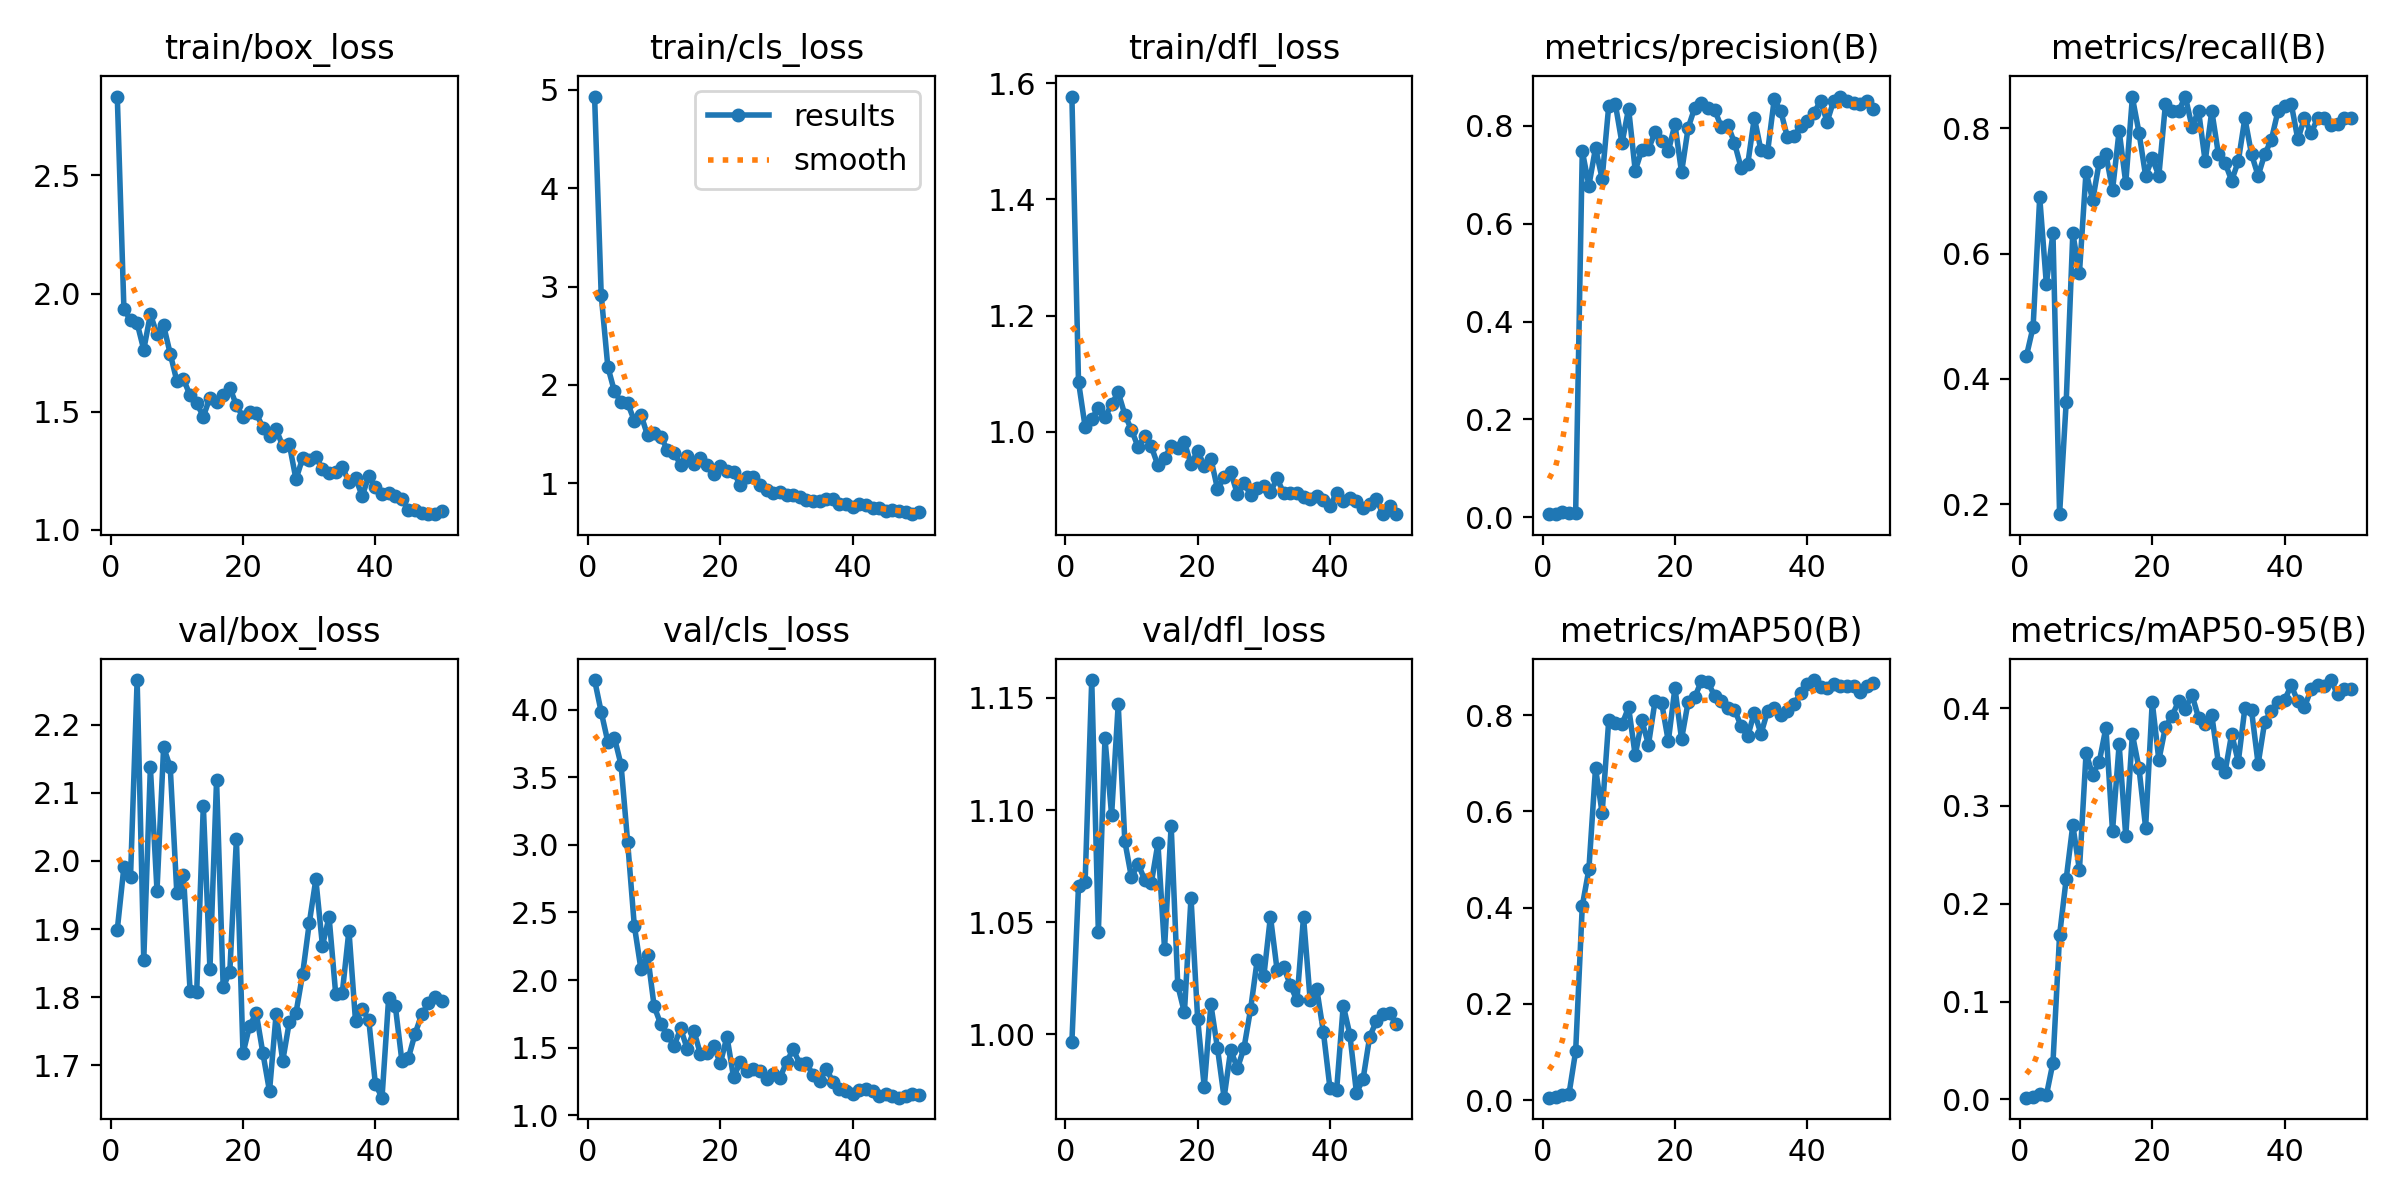

In [10]:
model = YOLO("./runs/detect/train4/weights/best.pt")

#### Métricas validación

In [11]:
metrics11n = model.val()
print(metrics11n)

Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.77s/it]


                   all         20         87      0.847      0.805       0.86      0.429
Speed: 5.2ms preprocess, 163.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val9
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x195eb7710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033

In [159]:
print('Precisión media en umbrales de IoU de 0.5 a 0.95:', metrics11n.box.map*100, '%')  
print('Precisión media en el umbral de IoU de 0.5:',metrics11n.box.map50*100,'%')  
print('Precisión media en el umbral de IoU de 0.75:',metrics11n.box.map75*100,'%' )  

Precisión media en umbrales de IoU de 0.5 a 0.95: 42.920480180764535 %
Precisión media en el umbral de IoU de 0.5: 86.02586590705728 %
Precisión media en el umbral de IoU de 0.75: 37.90032882465027 %


In [160]:
for key in metrics11n.results_dict.keys():
    print(key, metrics11n.results_dict[key])

metrics/precision(B) 0.8467743389951603
metrics/recall(B) 0.8045977011494253
metrics/mAP50(B) 0.8602586590705729
metrics/mAP50-95(B) 0.42920480180764536
fitness 0.4723101875339381


#### Evaluación test

In [161]:
model.eval()
results = model('./test')


image 1/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg: 640x640 5 Numberss, 121.4ms
image 2/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg: 640x640 7 Numberss, 105.3ms
image 3/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg: 640x640 1 Numbers, 109.6ms
image 4/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/4_png.rf.a581e378841aafbd9abde47536591fa9.jpg: 640x640 2 Numberss, 111.4ms
image 5/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg: 640x640 7 Numberss, 142.5ms
image 6

#### Detección de números

In [162]:
identificar_numero(TEST, results)

Total de números 51
Total de números identificados correctos 20
Porcentaje de aciertos 39.21568627450981 %
Porcentaje de error 60.78431372549019 %


## **Gráficas de rendimiento**

In [12]:
def crear_graficas_precision_recall(metricas):
    m1, m2, m3,m4=metricas
    precision_m1=m1.curves_results[0][0]
    recall_m1=m1.curves_results[0][1].flatten()
    precision_m2=m2.curves_results[0][0]
    recall_m2=m2.curves_results[0][1].flatten()
    precision_m3=m3.curves_results[0][0]
    recall_m3=m3.curves_results[3][1].flatten()
    precision_m4=m4.curves_results[0][0]
    recall_m4=m4.curves_results[0][1].flatten()
    
    plt.figure(figsize=(10, 5))
    plt.plot(precision_m1, recall_m1, label='Yolo8 small Curve')
    plt.plot(precision_m2, recall_m2, label='Yolo8 nano Curve')
    plt.plot(precision_m3, recall_m3, label='Yolo11 small Curve')
    plt.plot(precision_m4, recall_m4, label='Yolo11 nano Curve')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall(B) Curve')
    plt.legend()
    plt.show()
    

In [13]:
def crear_graficas_recall_confidence(metricas):
    m1, m2, m3,m4=metricas
    confidence_m1=m1.curves_results[3][0]
    recall_m1=m1.curves_results[3][1].flatten()
    confidence_m2=m2.curves_results[3][0]
    recall_m2=m2.curves_results[3][1].flatten()
    confidence_m3=m3.curves_results[3][0]
    recall_m3=m3.curves_results[3][1].flatten()
    confidence_m4=m4.curves_results[3][0]
    recall_m4=m4.curves_results[3][1].flatten()
    
    plt.figure(figsize=(10, 5))
    plt.plot(confidence_m1,recall_m1, label='Yolo8 small Curve')
    plt.plot(confidence_m2,recall_m2,  label='Yolo8 nano Curve')
    plt.plot(confidence_m3,recall_m3,  label='Yolo11 small Curve')
    plt.plot(confidence_m4,recall_m4,  label='Yolo11 nano Curve')
    plt.xlabel('Confidence')
    plt.ylabel('Recall')
    plt.title('Recall-Confidence(B) Curve')
    plt.legend()
    plt.show()
    

In [14]:
def crear_graficas_f1_confidence(metricas):
    m1, m2, m3,m4=metricas
    Confidence_m1=m1.curves_results[1][0]
    f1_m1=m1.curves_results[1][1].flatten()
    Confidence_m2=m2.curves_results[1][0]
    f1_m2=m2.curves_results[1][1].flatten()
    Confidence_m3=m3.curves_results[1][0]
    f1_m3=m3.curves_results[1][1].flatten()
    Confidence_m4=m4.curves_results[1][0]
    f1_m4=m4.curves_results[1][1].flatten()
    
    plt.figure(figsize=(10, 5))
    plt.plot(Confidence_m1,f1_m1,  label='Yolo8 small Curve')
    plt.plot(Confidence_m2,f1_m2,  label='Yolo8 nano Curve')
    plt.plot(Confidence_m3,f1_m3,  label='Yolo11 small Curve')
    plt.plot(Confidence_m4,f1_m4,  label='Yolo11 nano Curve')
    plt.xlabel('Confidence')
    plt.ylabel('F1')
    plt.title('F1-Confidence')
    plt.legend()
    plt.show()
    

In [15]:
def crear_graficas_precision_confidence(metricas):
    m1, m2, m3,m4=metricas
    confidence_m1=m1.curves_results[2][0]
    precision_m1=m1.curves_results[2][1].flatten()
    confidence_m2=m2.curves_results[2][0]
    precision_m2=m2.curves_results[2][1].flatten()
    confidence_m3=m3.curves_results[2][0]
    precision_m3=m3.curves_results[2][1].flatten()
    confidence_m4=m4.curves_results[2][0]
    precision_m4=m4.curves_results[2][1].flatten()
    
    plt.figure(figsize=(10, 5))
    plt.plot(confidence_m1,precision_m1, label='Yolo8 small Curve')
    plt.plot(confidence_m2,precision_m2, label='Yolo8 nano Curve')
    plt.plot(confidence_m3,precision_m3, label='Yolo11 small Curve')
    plt.plot(confidence_m4,precision_m4, label='Yolo11 nano Curve')
    plt.xlabel('Confidence')
    plt.ylabel('Precision')
    plt.title('Precision-Confidence')
    plt.legend()
    plt.show()
    

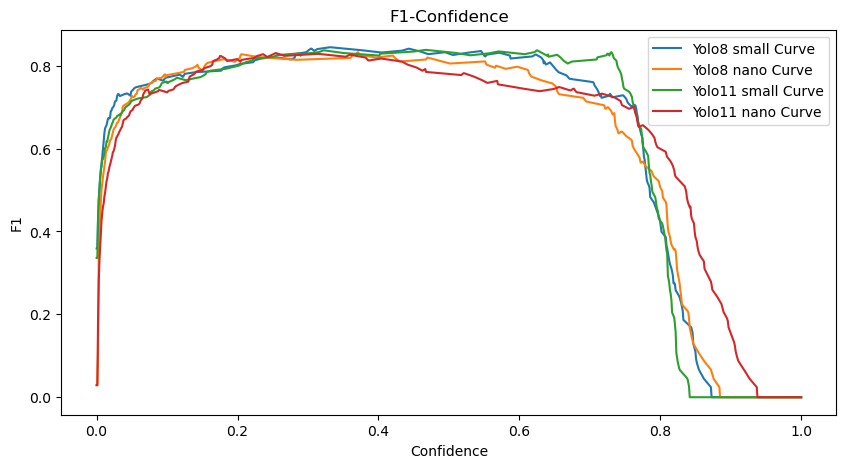

In [16]:
crear_graficas_f1_confidence([metrics8s, metrics8n, metrics11s, metrics11n])

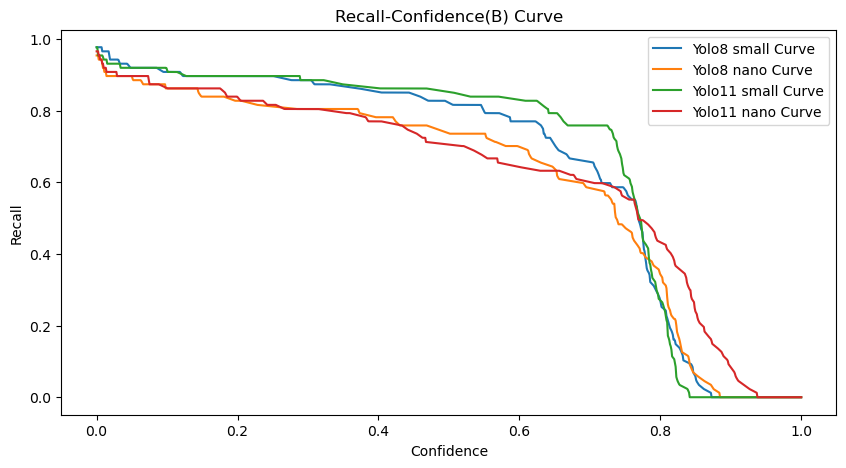

In [17]:
crear_graficas_recall_confidence([metrics8s, metrics8n, metrics11s, metrics11n])

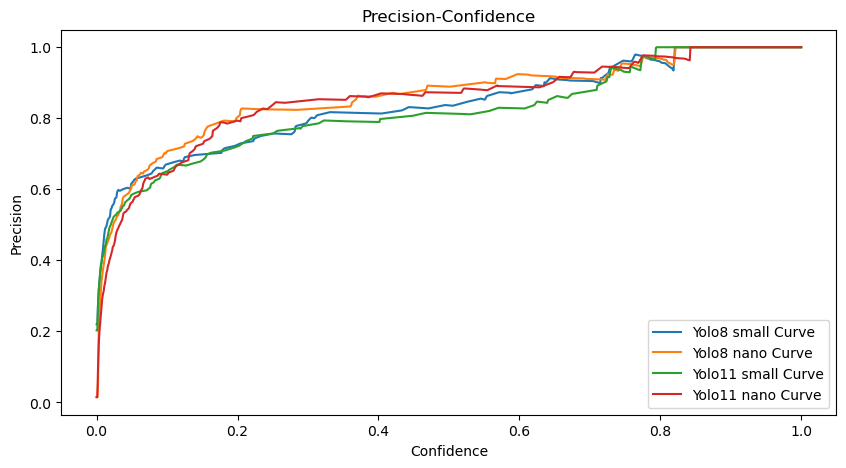

In [18]:
crear_graficas_precision_confidence([metrics8s, metrics8n, metrics11s, metrics11n])

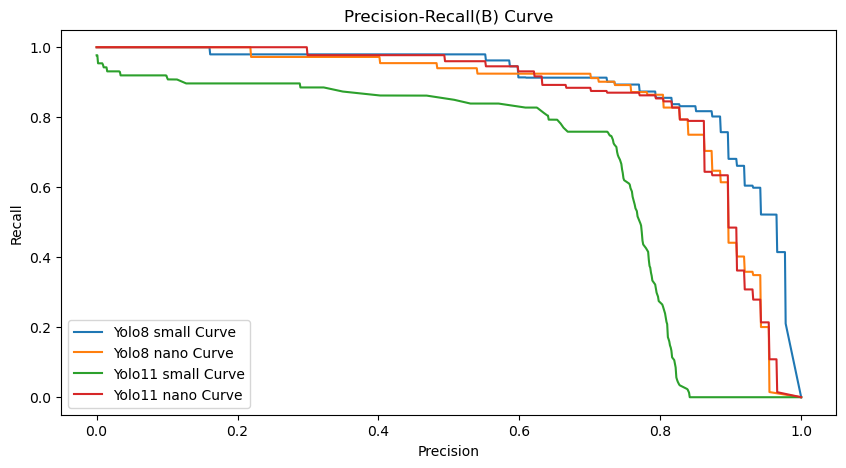

In [184]:
crear_graficas_precision_recall([metrics8s, metrics8n, metrics11s, metrics11n])

## Métricas más precisas del modelo que consideramos mejor

Tras analizar detenidamente las métricas obtenidas con los distintos modelos, consideramos que el resultado obtenido con YOLO11 nano (Yolo11n) es el mejor. Este modelo alcanza un 84.67% de precisión, lo que sugiere que tiene menos falsos positivos en comparación con los demás modelos. Además, aunque no presenta el valor más alto de recall, sigue siendo bastante competitivo, indicando que el modelo está detectando la mayor cantidad posible de dorsales correctamente.

La métrica de mAP50 de Yolo11n no es la más alta, pero su valor indica gran precisión en la detección de bounding boxes con un umbral de IoU de 0.5. Aunque la métrica mAP50-95 de Yolo11n es ligeramente inferior a la de otros modelos como yolo8 small o yolo11 small, lo que podría sugerir que estos últimos son más robusts en la detección de bounding boxes de diferentes tamaños y ubicaciones, esta diferencia no es realmente significativa.

Dado que nuestro objetivo principal es maximizar tanto la precisión como el recall para asegurarnos de detectar correctamente la mayor cantidad de dorsales posibles sin incurrir en demasiados falsos positivos, concluimos que Yolo11n es la mejor opción, ya que ofrece un buen desempeño en estos dos aspectos clave.

## Sin preprocesar las imágenes

In [3]:
# Cargar el modelo
model = YOLO("runs/detect/train4/weights/best.pt")

# Ruta al archivo COCO de anotaciones
coco_annotations_path = "_annotations_test.coco.json"

# Cargar las anotaciones COCO
coco = COCO(coco_annotations_path)

# Testear el modelo en las imágenes de prueba
results = model.predict(source="test", conf=0.2, save=False, imgsz=640)

# Función para calcular la IoU entre dos cajas
def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    # Intersección
    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    # Área de las cajas
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)

    # Unión
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

# Diccionario para guardar métricas de cada imagen
detection_real = {}

# Comparar detecciones con anotaciones reales
iou_threshold = 0.4
for result in results:
    # Obtener el nombre del archivo de la imagen
    image_name = result.path.split("\\")[-1].split("/")[-1]
    
    # Buscar el ID de la imagen en el archivo COCO
    image_ids = [img["id"] for img in coco.dataset["images"] if img["file_name"] == image_name]
    if not image_ids:
        print(f"No se encontró información para la imagen: {image_name}")
        continue
    image_id = image_ids[0]

    # Cargar las anotaciones para esta imagen
    annotations = coco.loadAnns(coco.getAnnIds(imgIds=[image_id]))
    gt_boxes = [ann["bbox"] for ann in annotations]
    gt_boxes = [[x, y, x + w, y + h] for x, y, w, h in gt_boxes]  # Convertir a [x1, y1, x2, y2]

    # Cargar las detecciones para esta imagen
    detected_boxes = result.boxes.xyxy.cpu().numpy()  # Cajas detectadas [x1, y1, x2, y2]

    # Calcular True Positives
    true_positives = 0
    for det_box in detected_boxes:
        for gt_box in gt_boxes:
            iou = compute_iou(det_box, gt_box)
            if iou >= iou_threshold:
                true_positives += 1
                break

    # Calcular métricas
    total_gt_boxes = len(gt_boxes)
    total_detected_boxes = len(detected_boxes)
    recall = true_positives / total_gt_boxes if total_gt_boxes > 0 else 0
    precision = true_positives / total_detected_boxes if total_detected_boxes > 0 else 0

    # Actualizamos el diccionario
    detection_real[image_name] = {"total_gt_boxes": total_gt_boxes, "total_detected_boxes": total_detected_boxes, "true_positives": true_positives, "recall": recall, "precision": precision}

    # Imprimir resultados
    print(f"Imagen: {image_name}")
    print(f"Total cajas reales: {total_gt_boxes}")
    print(f"Total cajas detectadas: {total_detected_boxes}")
    print(f"True Positives: {true_positives}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print("-" * 50)

# Calcular promedios de Recall y Precision
recalls = [v["recall"] for v in detection_real.values()]
precisions = [v["precision"] for v in detection_real.values()]
mean_recall = np.mean(recalls)
mean_precision = np.mean(precisions)


# Imprimir resultados finales
print(f"Promedio de Recall: {mean_recall:.2f}")
print(f"Promedio de Precision: {mean_precision:.2f}")


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

image 1/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg: 640x640 5 Numberss, 214.5ms
image 2/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg: 640x640 7 Numberss, 135.3ms
image 3/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg: 640x640 1 Numbers, 126.0ms
image 4/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/4_png.rf.a581e378841aafbd9abde47536591fa9.jpg: 640x640 3 Numberss, 107.7ms
image 5/11 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test

In [4]:
# Validar el modelo para obtener métricas como mAP
metrics = model.val(data="./dataset.yaml",  # Ruta al archivo data.yaml
                    imgsz=640)         # Tamaño de la imagen (opcional)

# Imprimir métricas de validación
print("Métricas de validación: ", metrics)


Ultralytics 8.3.54 🚀 Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i9-9880H 2.30GHz)


Fontconfig warning: ignoring UTF-8: not a valid region tag
val: Scanning /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/labels/valid.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]


                   all         20         87      0.847      0.805       0.86      0.429
Speed: 4.6ms preprocess, 152.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val5
Métricas de validación:  ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x1650d3410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,

In [15]:
import easyocr
import re  
from PIL import Image
import os
import numpy as np 
%matplotlib inline

# Instancia del lector de EasyOCR
reader = easyocr.Reader(['en'])

# Directorio donde están las imágenes originales
test = 'test'

# Directorio donde quieres guardar las imágenes recortadas
output_dir = 'output_crops'

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

images_read = {}

c = 0
for result in results:
    c += 1
    print("\n", c, result.path)
    
    # Obtener el nombre de la imagen original
    name_img = os.path.basename(result.path)
    image = Image.open(os.path.join(test, name_img))

    # Añadimos la imagen a un diccionario para poder acceder a ella más tarde
    images_read[name_img] = {}
    
    for idx, box in enumerate(result.boxes):
        # Obtener las coordenadas del bounding box (x1, y1, x2, y2)
        x1, y1, x2, y2 = box.xyxy[0].numpy().astype(int)
        
        # Recortar la imagen usando las coordenadas del bounding box
        cropped_image = image.crop((x1, y1, x2, y2))
        
        # Convertir la imagen recortada a un array numpy para EasyOCR
        cropped_image_np = np.array(cropped_image)
        result = reader.readtext(cropped_image_np)
        
        for detection in result:
            text = detection[1]
            numbers = re.findall(r'\d+', text)  
            if numbers:
                print('He detectado', numbers)
                images_read[name_img][f'crop{idx + 1}'] = numbers
                
                # Crear el nombre del archivo recortado y guardarlo en la carpeta de salida
                output_filename = os.path.join(output_dir, f"{name_img.split('.')[0]}_crop{idx + 1}.jpg")
                cropped_image.save(output_filename)
                print(f"Imagen recortada guardada en: {output_filename}")

print(images_read)



 1 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg
He detectado ['3261']
Imagen recortada guardada en: output_crops/13_png_crop1.jpg
He detectado ['2578']
Imagen recortada guardada en: output_crops/13_png_crop2.jpg
He detectado ['268']
Imagen recortada guardada en: output_crops/13_png_crop4.jpg
He detectado ['010']
Imagen recortada guardada en: output_crops/13_png_crop5.jpg

 2 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg
He detectado ['57643']
Imagen recortada guardada en: output_crops/18_png_crop1.jpg
He detectado ['1570']
Imagen recortada guardada en: output_crops/18_png_crop2.jpg

 3 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg
He detectado ['971']

In [16]:
for image_name, crops in images_read.items():
    print(f"\nResultados para la imagen: {image_name}")

    # Contador de aciertos
    correct = 0
    
    # Obtener los números reales de la imagen desde el diccionario
    true_numbers_for_image = true_numbers.get(image_name, [])
    
    for crop_name, detected_numbers in crops.items():
        # Comparar los números detectados con los números reales
        for detected_number in detected_numbers:
            if detected_number in true_numbers_for_image:
                status = "Correcto"
                correct += 1
            else:
                status = "Incorrecto"
            print(f"  Número detectado: {detected_number} - {status}")
            
    print(f"Correctos: {correct}")
    print(f"Total de números reales: {len(crops)}")

    # Actualizamos el diccionario de las detecciones
    detection_real[image_name]["detected_numbers"] = len(crops)
    detection_real[image_name]["correct_numbers"] = correct



Resultados para la imagen: 13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg
  Número detectado: 3261 - Correcto
  Número detectado: 2578 - Correcto
  Número detectado: 268 - Incorrecto
  Número detectado: 010 - Incorrecto
Correctos: 2
Total de números reales: 4

Resultados para la imagen: 18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg
  Número detectado: 57643 - Correcto
  Número detectado: 1570 - Incorrecto
Correctos: 1
Total de números reales: 2

Resultados para la imagen: 26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg
  Número detectado: 971 - Correcto
Correctos: 1
Total de números reales: 1

Resultados para la imagen: 4_png.rf.a581e378841aafbd9abde47536591fa9.jpg
  Número detectado: 21431 - Correcto
  Número detectado: 26251 - Correcto
Correctos: 2
Total de números reales: 2

Resultados para la imagen: 7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg
  Número detectado: 1068 - Incorrecto
  Número detectado: 007 - Incorrecto
Correctos: 0
Total de números reales: 2

Resultados para la im

In [17]:
# Calcular métricas OCR para cada imagen y promedios generales

# Inicializar listas para guardar las métricas por imagen
percent_aciertos_bounding_boxes = []
percent_aciertos_cajas_yolo = []
percent_aciertos_true_positives = []
percent_aciertos_predicciones_ocr = []

# Calcular las métricas por imagen
for image_name, metrics in detection_real.items():
    total_gt_boxes = metrics["total_gt_boxes"]
    total_detected_boxes = metrics["total_detected_boxes"]
    true_positives = metrics["true_positives"]
    detected_numbers = metrics.get("detected_numbers", 0)
    correct_numbers = metrics.get("correct_numbers", 0)

    # Mostramos los porcentajes del OCR por imagen
    print(f"\nResultados para la imagen: {image_name}")
    print(f"Porcentaje de aciertos en bounding boxes: {correct_numbers / total_gt_boxes * 100:.2f}%")
    print(f"Porcentaje de aciertos en cajas YOLO: {correct_numbers / total_detected_boxes * 100:.2f}%")
    print(f"Porcentaje de aciertos en True Positives: {correct_numbers / true_positives * 100:.2f}%")
    print(f"Porcentaje de aciertos en predicciones OCR: {correct_numbers / detected_numbers * 100:.2f}%")
    
    # Cálculos de porcentaje
    percent_aciertos_bounding_boxes.append(correct_numbers / total_gt_boxes * 100)
    percent_aciertos_cajas_yolo.append(correct_numbers / total_detected_boxes * 100)
    percent_aciertos_true_positives.append(correct_numbers / true_positives * 100)
    percent_aciertos_predicciones_ocr.append(correct_numbers / detected_numbers * 100)

    

# Calcular promedios
mean_percent_aciertos_bounding_boxes = np.mean(percent_aciertos_bounding_boxes)
mean_percent_aciertos_cajas_yolo = np.mean(percent_aciertos_cajas_yolo)
mean_percent_aciertos_true_positives = np.mean(percent_aciertos_true_positives)
mean_percent_aciertos_predicciones_ocr = np.mean(percent_aciertos_predicciones_ocr)


# Mostrar resultados
print("\nResultados finales:")
print(f"Porcentaje de aciertos en bounding boxes: {mean_percent_aciertos_bounding_boxes:.2f}%")
print(f"Porcentaje de aciertos en cajas YOLO: {mean_percent_aciertos_cajas_yolo:.2f}%")
print(f"Porcentaje de aciertos en True Positives: {mean_percent_aciertos_true_positives:.2f}%")
print(f"Porcentaje de aciertos en predicciones OCR: {mean_percent_aciertos_predicciones_ocr:.2f}%")





Resultados para la imagen: 13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg
Porcentaje de aciertos en bounding boxes: 66.67%
Porcentaje de aciertos en cajas YOLO: 40.00%
Porcentaje de aciertos en True Positives: 66.67%
Porcentaje de aciertos en predicciones OCR: 50.00%

Resultados para la imagen: 18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg
Porcentaje de aciertos en bounding boxes: 9.09%
Porcentaje de aciertos en cajas YOLO: 14.29%
Porcentaje de aciertos en True Positives: 16.67%
Porcentaje de aciertos en predicciones OCR: 50.00%

Resultados para la imagen: 26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg
Porcentaje de aciertos en bounding boxes: 33.33%
Porcentaje de aciertos en cajas YOLO: 100.00%
Porcentaje de aciertos en True Positives: 100.00%
Porcentaje de aciertos en predicciones OCR: 100.00%

Resultados para la imagen: 4_png.rf.a581e378841aafbd9abde47536591fa9.jpg
Porcentaje de aciertos en bounding boxes: 100.00%
Porcentaje de aciertos en cajas YOLO: 66.67%
Porcentaje de aciertos

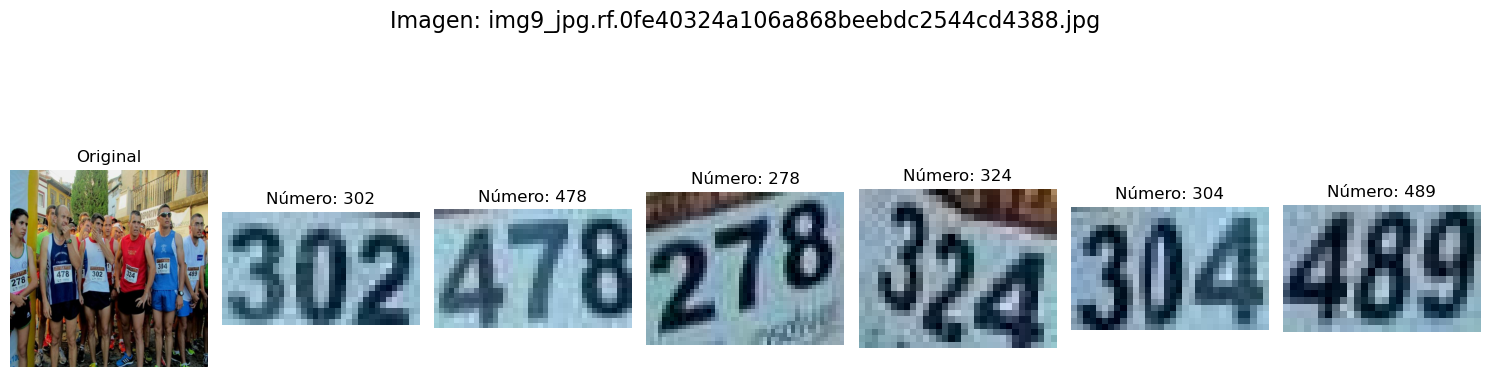


Métricas para la imagen: img9_jpg.rf.0fe40324a106a868beebdc2544cd4388.jpg
Recall: 1.00
Precision: 1.00
Porcentaje de aciertos en bounding boxes: 100.00%
Porcentaje de aciertos en cajas YOLO: 100.00%
Porcentaje de aciertos en True Positives: 100.00%
Porcentaje de aciertos en predicciones OCR: 100.00%


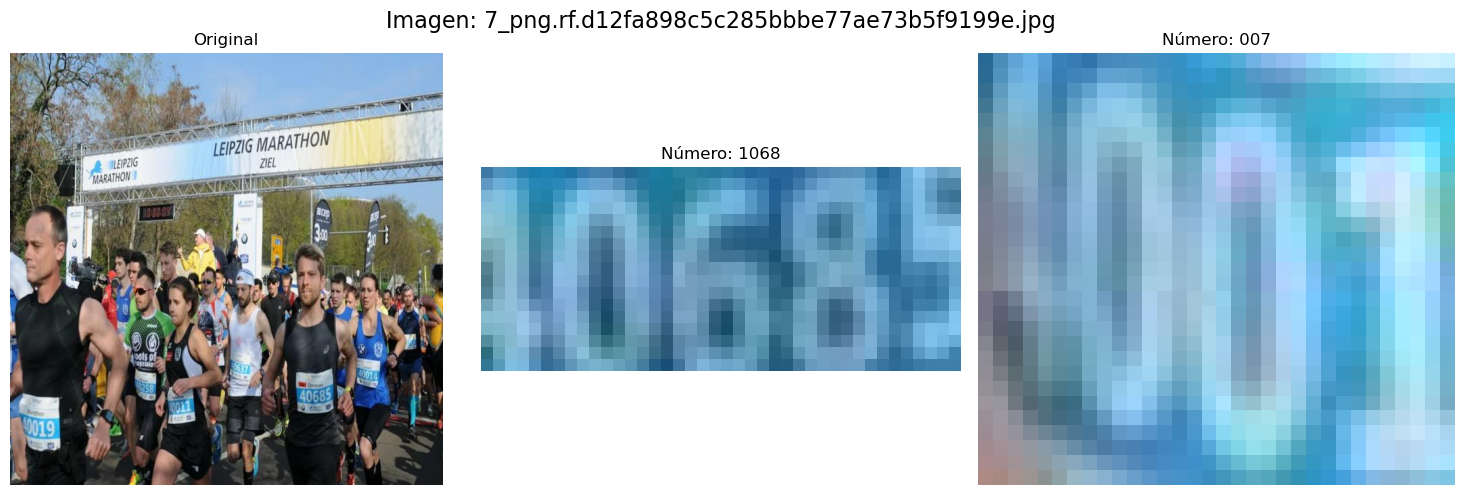


Métricas para la imagen: 7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg
Recall: 0.83
Precision: 0.71
Porcentaje de aciertos en bounding boxes: 0.00%
Porcentaje de aciertos en cajas YOLO: 0.00%
Porcentaje de aciertos en True Positives: 0.00%
Porcentaje de aciertos en predicciones OCR: 0.00%


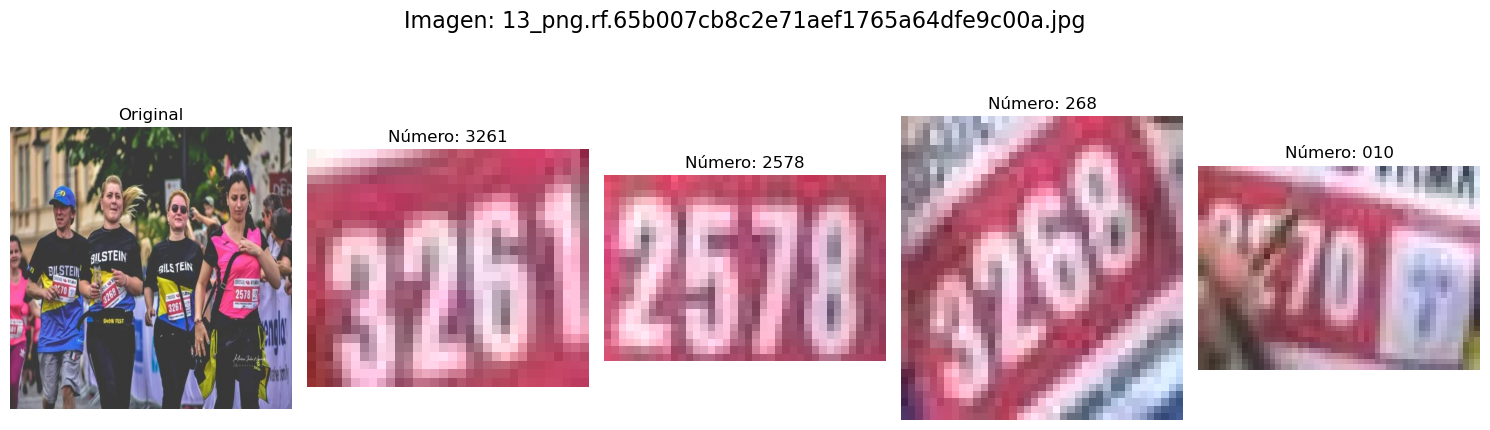


Métricas para la imagen: 13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg
Recall: 1.00
Precision: 0.60
Porcentaje de aciertos en bounding boxes: 66.67%
Porcentaje de aciertos en cajas YOLO: 40.00%
Porcentaje de aciertos en True Positives: 66.67%
Porcentaje de aciertos en predicciones OCR: 50.00%


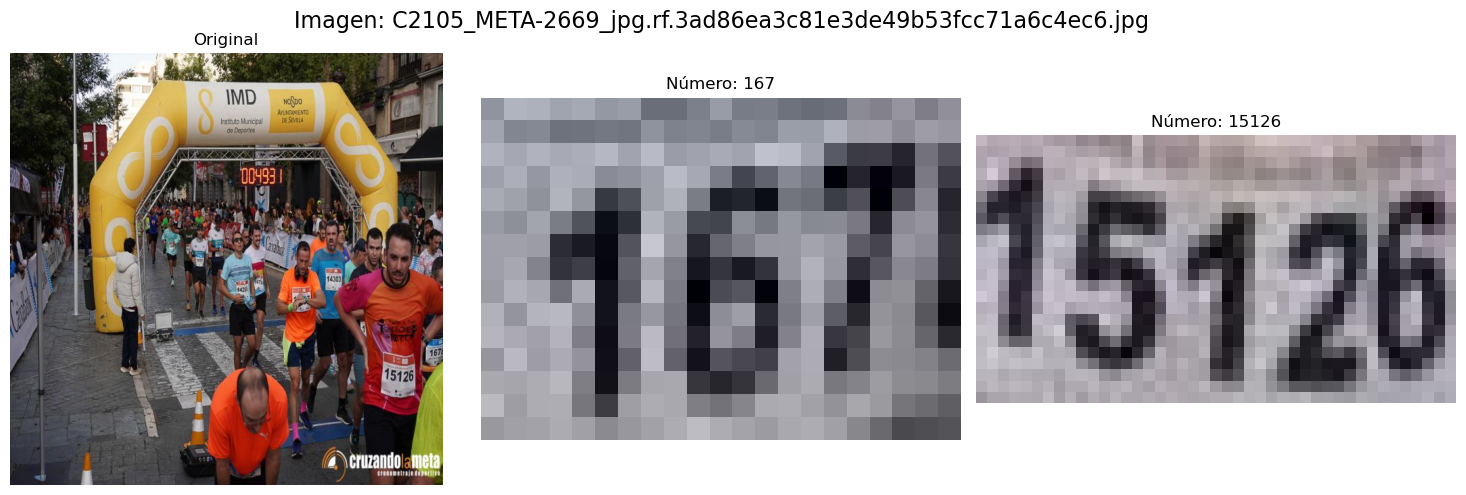


Métricas para la imagen: C2105_META-2669_jpg.rf.3ad86ea3c81e3de49b53fcc71a6c4ec6.jpg
Recall: 1.00
Precision: 1.00
Porcentaje de aciertos en bounding boxes: 40.00%
Porcentaje de aciertos en cajas YOLO: 40.00%
Porcentaje de aciertos en True Positives: 40.00%
Porcentaje de aciertos en predicciones OCR: 100.00%


In [18]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directorios absolutos
test_dir = os.path.abspath('test')
output_crops_dir = os.path.abspath('output_crops')

# Especificar manualmente los nombres de las imágenes
image_names = ['img9_jpg.rf.0fe40324a106a868beebdc2544cd4388.jpg', 
               '7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg', 
               '13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg',
               'C2105_META-2669_jpg.rf.3ad86ea3c81e3de49b53fcc71a6c4ec6.jpg']  # Agregar más nombres si es necesario

# Crear figuras para cada imagen especificada
for image_name in image_names:
    # Verificar si la imagen está en el diccionario de imágenes leídas
    if image_name in images_read.keys():
        # Ruta a la imagen original
        original_image_path = os.path.join(test_dir, image_name)
        
        try:
            # Cargar la imagen original
            original_image = Image.open(original_image_path)
            
            # Obtener los crops correspondientes desde el diccionario de predicciones
            crops_info = images_read[image_name]
            num_crops = len(crops_info)
            
            # Crear la figura
            fig, ax = plt.subplots(1, num_crops + 1, figsize=(15, 5))
            fig.suptitle(f"Imagen: {image_name}", fontsize=16)
            
            # Mostrar la imagen original
            ax[0].imshow(original_image)
            ax[0].set_title("Original")
            ax[0].axis('off')
            
            # Mostrar los crops con sus números predichos
            for idx, (crop_name, detected_numbers) in enumerate(crops_info.items(), start=1):
                crop_path = os.path.join(output_crops_dir, f"{image_name.split('.')[0]}_{crop_name}.jpg")
                if os.path.exists(crop_path):
                    cropped_image = Image.open(crop_path)
                    ax[idx].imshow(cropped_image)
                    ax[idx].set_title(f"Número: {', '.join(detected_numbers)}")
                    ax[idx].axis('off')
                else:
                    ax[idx].set_title(f"Recorte no encontrado: {crop_name}")
                    ax[idx].axis('off')
            
            plt.tight_layout()
            plt.show()

            # Mostramos métricas para la imagen
            print(f"\nMétricas para la imagen: {image_name}")
            print(f"Recall: {detection_real[image_name]['recall']:.2f}")
            print(f"Precision: {detection_real[image_name]['precision']:.2f}")
            total_gt_boxes = detection_real[image_name]['total_gt_boxes']
            total_detected_boxes = detection_real[image_name]['total_detected_boxes']
            true_positives = detection_real[image_name]['true_positives']
            detected_numbers = detection_real[image_name].get('detected_numbers', 0)
            correct_numbers = detection_real[image_name].get('correct_numbers', 0)
            print(f"Porcentaje de aciertos en bounding boxes: {correct_numbers / total_gt_boxes * 100:.2f}%")
            print(f"Porcentaje de aciertos en cajas YOLO: {correct_numbers / total_detected_boxes * 100:.2f}%")
            print(f"Porcentaje de aciertos en True Positives: {correct_numbers / true_positives * 100:.2f}%")
            print(f"Porcentaje de aciertos en predicciones OCR: {correct_numbers / detected_numbers * 100:.2f}%")
                    

        except FileNotFoundError:
            print(f"No se encontró la imagen original: {original_image_path}")
    else:
        print(f"La imagen especificada '{image_name}' no se encuentra en la lista de imágenes.")


## Aplicando preprocesado a los cortes

In [19]:
import easyocr
import re  
from PIL import Image
import os
import numpy as np
import cv2

# Instancia del lector de EasyOCR
reader = easyocr.Reader(['en'])

# Directorio donde están las imágenes originales
test = 'test'

# Directorio donde quieres guardar las imágenes recortadas
output_dir = 'output_crops'

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

images_read = {}

c = 0
for result in results:
    c += 1
    print("\n", c, result.path)
    
    # Obtener el nombre de la imagen original
    name_img = os.path.basename(result.path)
    image = Image.open(os.path.join(test, name_img))

    # Añadimos la imagen a un diccionario para poder acceder a ella más tarde
    images_read[name_img] = {}
    
    for idx, box in enumerate(result.boxes):
        # Obtener las coordenadas del bounding box (x1, y1, x2, y2)
        x1, y1, x2, y2 = box.xyxy[0].numpy().astype(int)
        
        # Recortar la imagen usando las coordenadas del bounding box
        cropped_image = image.crop((x1, y1, x2, y2))

        # Convertir la imagen recortada (PIL) a un array de NumPy
        cropped_image_np = np.array(cropped_image)

        # Mejorar el recorte
        upscale_img = cv2.resize(cropped_image_np, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        blur_img = cv2.bilateralFilter(upscale_img, d=9, sigmaColor=75, sigmaSpace=75)

        # Convertir blur_img a formato PIL.Image si necesitas guardarlo
        blur_img_pil = Image.fromarray(cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB))
        
        # Convertir la imagen recortada a un array numpy para EasyOCR
        # cropped_image_np = np.array(blur_img)
        result = reader.readtext(blur_img)
        
        for detection in result:
            text = detection[1]
            numbers = re.findall(r'\d+', text)  
            if numbers:
                print('He detectado', numbers)
                images_read[name_img][f'crop{idx + 1}'] = numbers
                
                # Crear el nombre del archivo recortado y guardarlo en la carpeta de salida
                output_filename = os.path.join(output_dir, f"{name_img.split('.')[0]}_crop{idx + 1}.jpg")
                blur_img_pil.save(output_filename)
                print(f"Imagen recortada guardada en: {output_filename}")

print(images_read)



 1 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg
He detectado ['3261']
Imagen recortada guardada en: output_crops/13_png_crop1.jpg
He detectado ['2578']
Imagen recortada guardada en: output_crops/13_png_crop2.jpg
He detectado ['268']
Imagen recortada guardada en: output_crops/13_png_crop4.jpg

 2 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg
He detectado ['57645']
Imagen recortada guardada en: output_crops/18_png_crop1.jpg
He detectado ['73950']
Imagen recortada guardada en: output_crops/18_png_crop3.jpg

 3 /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/VA/trabajo4/Bib Numbers/test/26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg
He detectado ['971']
Imagen recortada guardada en: output_crops/26_png_crop1.jpg

 4 /Users/carmenlo

In [20]:
for image_name, crops in images_read.items():
    print(f"\nResultados para la imagen: {image_name}")

    # Contador de aciertos
    correct = 0
    
    # Obtener los números reales de la imagen desde el diccionario
    true_numbers_for_image = true_numbers.get(image_name, [])
    
    for crop_name, detected_numbers in crops.items():
        # Comparar los números detectados con los números reales
        for detected_number in detected_numbers:
            if detected_number in true_numbers_for_image:
                status = "Correcto"
                correct += 1
            else:
                status = "Incorrecto"
            print(f"  Número detectado: {detected_number} - {status}")
            
    print(f"Correctos: {correct}")
    print(f"Total de números reales: {len(crops)}")

    # Actualizamos el diccionario de las detecciones
    detection_real[image_name]["detected_numbers"] = len(crops)
    detection_real[image_name]["correct_numbers"] = correct


Resultados para la imagen: 13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg
  Número detectado: 3261 - Correcto
  Número detectado: 2578 - Correcto
  Número detectado: 268 - Incorrecto
Correctos: 2
Total de números reales: 3

Resultados para la imagen: 18_png.rf.f0702d20b37c10024bd28e085ff45572.jpg
  Número detectado: 57645 - Incorrecto
  Número detectado: 73950 - Incorrecto
Correctos: 0
Total de números reales: 2

Resultados para la imagen: 26_png.rf.b5b0349b6964ed9e0ac8df3a2e0986df.jpg
  Número detectado: 971 - Correcto
Correctos: 1
Total de números reales: 1

Resultados para la imagen: 4_png.rf.a581e378841aafbd9abde47536591fa9.jpg
  Número detectado: 21431 - Correcto
  Número detectado: 26251 - Correcto
Correctos: 2
Total de números reales: 2

Resultados para la imagen: 7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg
  Número detectado: 1068 - Incorrecto
  Número detectado: 007 - Incorrecto
Correctos: 0
Total de números reales: 2

Resultados para la imagen: 8_png.rf.aab1a32947f05ea3b74

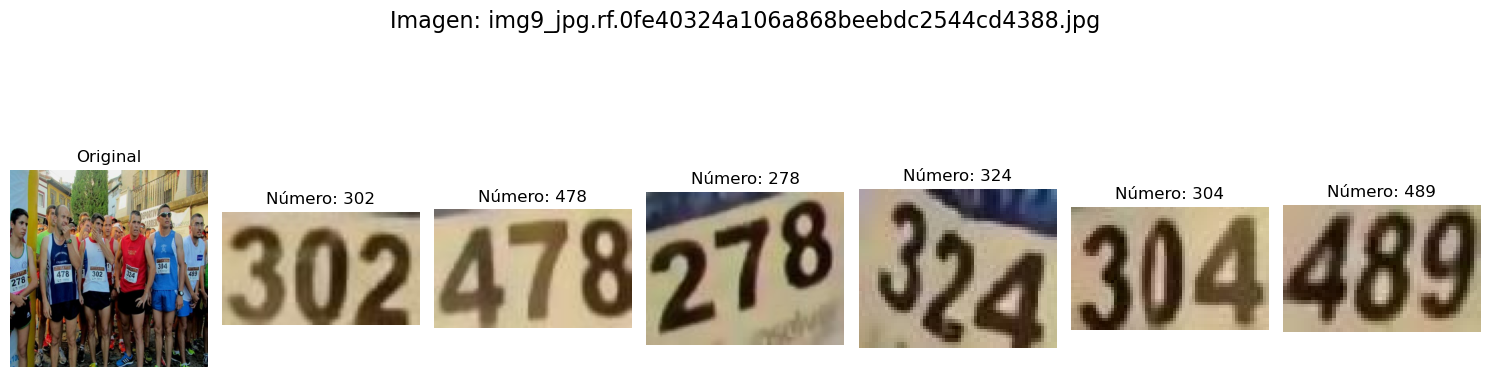


Métricas para la imagen: img9_jpg.rf.0fe40324a106a868beebdc2544cd4388.jpg
Recall: 1.00
Precision: 1.00
Porcentaje de aciertos en bounding boxes: 100.00%
Porcentaje de aciertos en cajas YOLO: 100.00%
Porcentaje de aciertos en True Positives: 100.00%
Porcentaje de aciertos en predicciones OCR: 100.00%


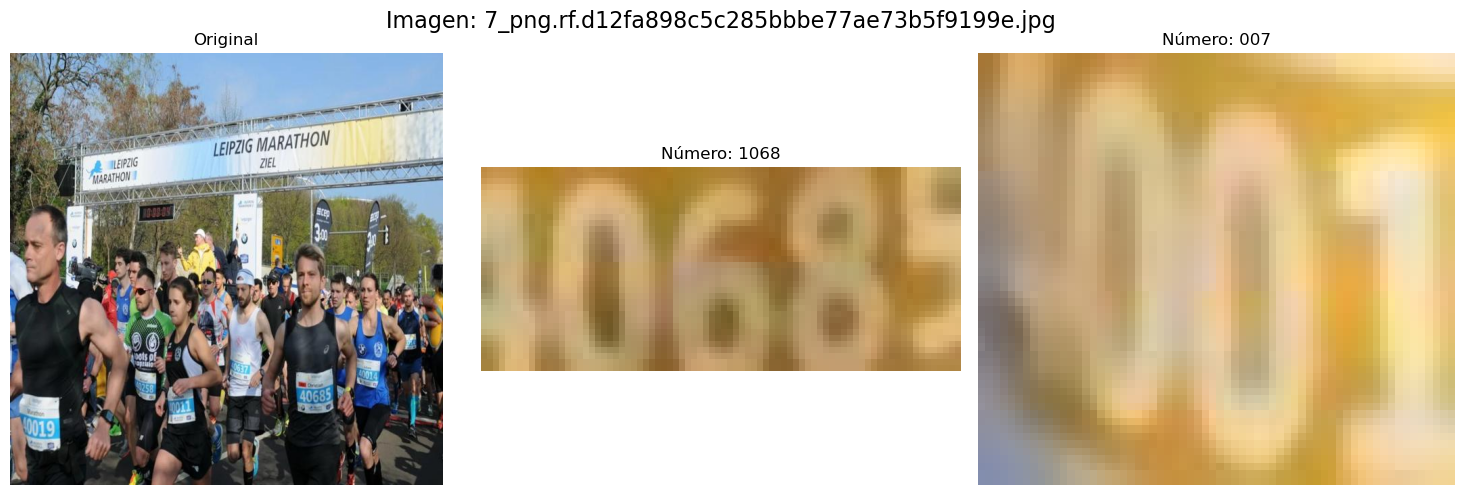


Métricas para la imagen: 7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg
Recall: 0.83
Precision: 0.71
Porcentaje de aciertos en bounding boxes: 0.00%
Porcentaje de aciertos en cajas YOLO: 0.00%
Porcentaje de aciertos en True Positives: 0.00%
Porcentaje de aciertos en predicciones OCR: 0.00%


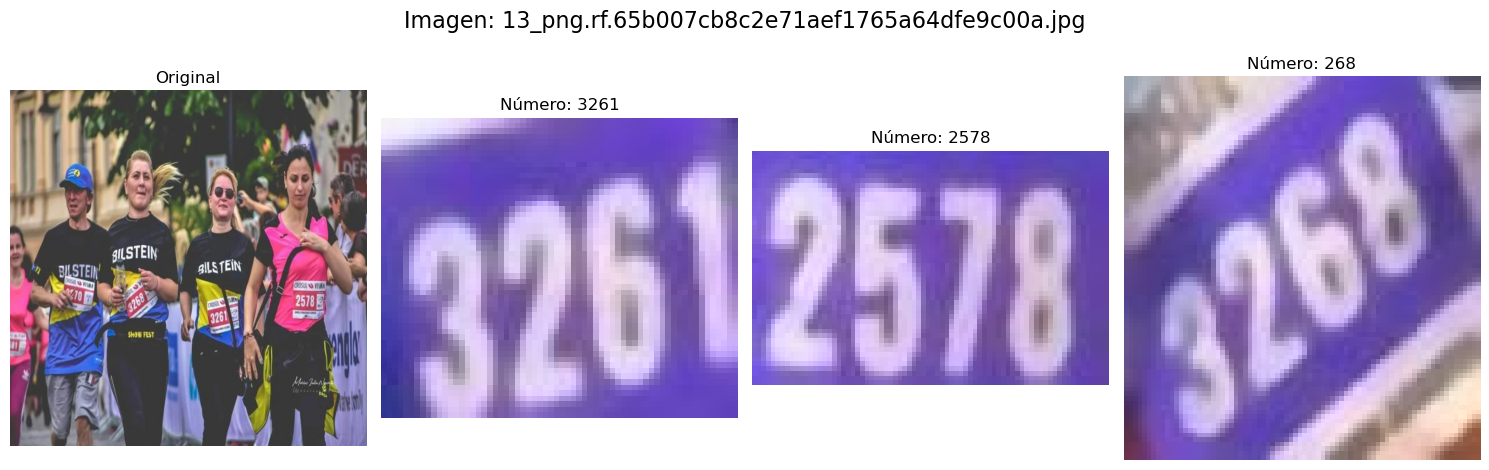


Métricas para la imagen: 13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg
Recall: 1.00
Precision: 0.60
Porcentaje de aciertos en bounding boxes: 66.67%
Porcentaje de aciertos en cajas YOLO: 40.00%
Porcentaje de aciertos en True Positives: 66.67%
Porcentaje de aciertos en predicciones OCR: 66.67%


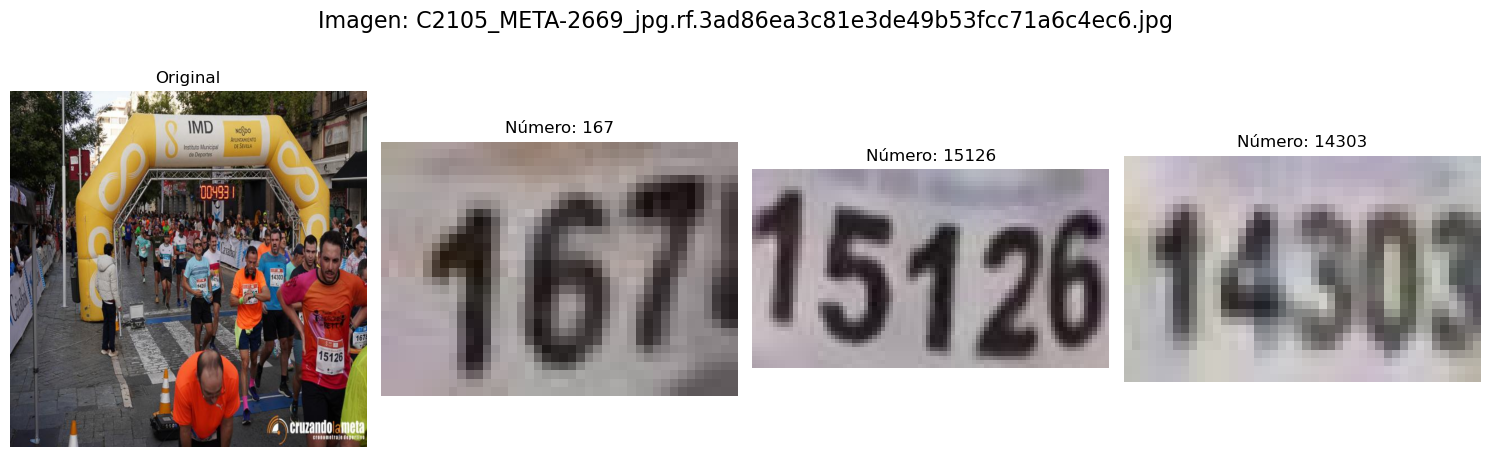


Métricas para la imagen: C2105_META-2669_jpg.rf.3ad86ea3c81e3de49b53fcc71a6c4ec6.jpg
Recall: 1.00
Precision: 1.00
Porcentaje de aciertos en bounding boxes: 60.00%
Porcentaje de aciertos en cajas YOLO: 60.00%
Porcentaje de aciertos en True Positives: 60.00%
Porcentaje de aciertos en predicciones OCR: 100.00%


In [21]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directorios absolutos
test_dir = os.path.abspath('test')
output_crops_dir = os.path.abspath('output_crops')

# Especificar manualmente los nombres de las imágenes
image_names = ['img9_jpg.rf.0fe40324a106a868beebdc2544cd4388.jpg', 
               '7_png.rf.d12fa898c5c285bbbe77ae73b5f9199e.jpg', 
               '13_png.rf.65b007cb8c2e71aef1765a64dfe9c00a.jpg',
               'C2105_META-2669_jpg.rf.3ad86ea3c81e3de49b53fcc71a6c4ec6.jpg']  # Agregar más nombres si es necesario

# Crear figuras para cada imagen especificada
for image_name in image_names:
    # Verificar si la imagen está en el diccionario de imágenes leídas
    if image_name in images_read.keys():
        # Ruta a la imagen original
        original_image_path = os.path.join(test_dir, image_name)
        
        try:
            # Cargar la imagen original
            original_image = Image.open(original_image_path)
            
            # Obtener los crops correspondientes desde el diccionario de predicciones
            crops_info = images_read[image_name]
            num_crops = len(crops_info)
            
            # Crear la figura
            fig, ax = plt.subplots(1, num_crops + 1, figsize=(15, 5))
            fig.suptitle(f"Imagen: {image_name}", fontsize=16)
            
            # Mostrar la imagen original
            ax[0].imshow(original_image)
            ax[0].set_title("Original")
            ax[0].axis('off')
            
            # Mostrar los crops con sus números predichos
            for idx, (crop_name, detected_numbers) in enumerate(crops_info.items(), start=1):
                crop_path = os.path.join(output_crops_dir, f"{image_name.split('.')[0]}_{crop_name}.jpg")
                if os.path.exists(crop_path):
                    cropped_image = Image.open(crop_path)
                    ax[idx].imshow(cropped_image)
                    ax[idx].set_title(f"Número: {', '.join(detected_numbers)}")
                    ax[idx].axis('off')
                else:
                    ax[idx].set_title(f"Recorte no encontrado: {crop_name}")
                    ax[idx].axis('off')
            
            plt.tight_layout()
            plt.show()

            # Mostramos métricas para la imagen
            print(f"\nMétricas para la imagen: {image_name}")
            print(f"Recall: {detection_real[image_name]['recall']:.2f}")
            print(f"Precision: {detection_real[image_name]['precision']:.2f}")
            total_gt_boxes = detection_real[image_name]['total_gt_boxes']
            total_detected_boxes = detection_real[image_name]['total_detected_boxes']
            true_positives = detection_real[image_name]['true_positives']
            detected_numbers = detection_real[image_name].get('detected_numbers', 0)
            correct_numbers = detection_real[image_name].get('correct_numbers', 0)
            print(f"Porcentaje de aciertos en bounding boxes: {correct_numbers / total_gt_boxes * 100:.2f}%")
            print(f"Porcentaje de aciertos en cajas YOLO: {correct_numbers / total_detected_boxes * 100:.2f}%")
            print(f"Porcentaje de aciertos en True Positives: {correct_numbers / true_positives * 100:.2f}%")
            print(f"Porcentaje de aciertos en predicciones OCR: {correct_numbers / detected_numbers * 100:.2f}%")
                    

        except FileNotFoundError:
            print(f"No se encontró la imagen original: {original_image_path}")
    else:
        print(f"La imagen especificada '{image_name}' no se encuentra en la lista de imágenes.")
